## 导入包

In [1]:
## 数据库工具
import math
import numpy as np
import pandas as pd
import os

## 绘图工具
from plotnine import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, rc
from matplotlib import cm,colors
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 8)
#import geopandas

## 函数工具
from scipy.spatial.distance import cdist
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors

## 其他工具
from tqdm import tqdm
import warnings
warnings.simplefilter('ignore')

## 读取数据

**定义读取数据的函数**

In [2]:
def read_csv_singe_document(file_dir):
    """
    Extract data from csv's saved in a document,
    and put them together into one single DateFrame.
    
    Args:
        file_dir: A string meaning the highest file directory.
    
    Returns:
        A dataframe containing all the data.
    
    Raises:
        ImportError: A error occurred when pandas, numpy, os and tqdm are not installed.
    """
    try:
        import pandas as pd
        import numpy as np
        import os
        from tqdm import tqdm
    except ImportError:
        raise
    else:
        print("Packages have been loaded.")
        
    all_csv_list = os.listdir(file_dir)  # get csv list
    for single_csv in tqdm(all_csv_list):
        single_data_frame = pd.read_csv(os.path.join(file_dir, single_csv))
        #     print(single_data_frame.info())
        if single_csv == all_csv_list[0]:
            all_data_frame = single_data_frame
        else:  # concatenate all csv to a single dataframe, ingore index
            all_data_frame = pd.concat([all_data_frame, single_data_frame], ignore_index=True)
    return all_data_frame

In [3]:
def read_csv_double_documents(file_dir):
    """
    Extract data from csv's saved in multiple documents of a document,
    and put them together into one single DateFrame.
    
    Args:
        file_dir: A string meaning the highest file directory.
    
    Returns:
        A dataframe containing all the data.
    
    Raises:
        ImportError: A error occurred when pandas, numpy, os and tqdm are not installed.
    """
    try:
        import pandas as pd
        import numpy as np
        import os
        from tqdm import tqdm
    except ImportError:
        raise
    else:
        print("Packages have been loaded.")
    
    folder_dir = os.listdir(file_dir)  # get folder list
    
    for folder in tqdm(folder_dir):
        all_csv_list = os.listdir(os.path.join(file_dir, folder))  # get csv list within a folder
        for single_csv in tqdm(all_csv_list):
            single_data_frame = pd.read_csv(os.path.join(file_dir, folder, single_csv))
            #     print(single_data_frame.info())
            if single_csv == all_csv_list[0] and folder == folder_dir[0]:
                all_data_frame = single_data_frame
            else:  # concatenate all csv to a single dataframe, ingore index
                all_data_frame = pd.concat([single_data_frame, all_data_frame], ignore_index=True)
    return all_data_frame

**使用函数**

In [383]:
raise Exception
test_data = read_csv_singe_document('./data/城市_20210101-20211113')

100%|████████████████████████████████████████████████████████████████████████████████| 317/317 [01:07<00:00,  4.69it/s]


In [4]:
train_data = read_csv_double_documents('./data/城市-new')

 23%|██████████████████▎                                                              | 83/366 [00:11<00:44,  6.31it/s]


 41%|████████████████████████████████▌                                               | 149/366 [00:24<00:58,  3.72it/s]


 59%|██████████████████████████████████████████████▉                                 | 215/366 [00:43<00:43,  3.49it/s]


 77%|█████████████████████████████████████████████████████████████▍                  | 281/366 [01:06<00:31,  2.68it/s]


 95%|███████████████████████████████████████████████████████████████████████████▊    | 347/366 [01:39<00:09,  2.10it/s]


 12%|█████████▉                                                                       | 45/365 [00:22<02:50,  1.88it/s]


 30%|████████████████████████▎                                                       | 111/365 [01:00<02:43,  1.56it/s]


 48%|██████████████████████████████████████▊                                         | 177/365 [01:42<01:59,  1.58it/s]


 67%|█████████████████████████████████████████████████████▎                          | 243/365 [02:28<01:29,  1.37it/s]


 85%|███████████████████████████████████████████████████████████████████▋            | 309/365 [03:20<00:48,  1.15it/s]


  2%|█▊                                                                                | 8/360 [00:07<05:14,  1.12it/s]


 21%|████████████████▋                                                                | 74/360 [01:08<04:33,  1.05it/s]


 39%|███████████████████████████████                                                 | 140/360 [02:15<04:26,  1.21s/it]


 57%|█████████████████████████████████████████████▊                                  | 206/360 [03:19<02:19,  1.10it/s]


 76%|████████████████████████████████████████████████████████████▍                   | 272/360 [04:24<01:27,  1.00it/s]


 94%|███████████████████████████████████████████████████████████████████████████     | 338/360 [05:35<00:23,  1.09s/it]


 12%|█████████▎                                                                       | 42/364 [00:56<06:51,  1.28s/it]


 30%|███████████████████████▋                                                        | 108/364 [02:23<05:17,  1.24s/it]


 48%|██████████████████████████████████████▏                                         | 174/364 [03:50<03:51,  1.22s/it]


 66%|████████████████████████████████████████████████████▋                           | 240/364 [05:25<03:07,  1.51s/it]


 84%|███████████████████████████████████████████████████████████████████▎            | 306/364 [07:04<01:22,  1.43s/it]


  2%|█▎                                                                                | 6/366 [00:10<09:37,  1.60s/it]


 20%|███████████████▉                                                                 | 72/366 [01:57<08:33,  1.75s/it]


 38%|██████████████████████████████▏                                                 | 138/366 [03:42<05:51,  1.54s/it]


 56%|████████████████████████████████████████████▌                                   | 204/366 [05:23<04:22,  1.62s/it]


 74%|███████████████████████████████████████████████████████████                     | 270/366 [07:15<02:46,  1.73s/it]


 92%|█████████████████████████████████████████████████████████████████████████▍      | 336/366 [09:06<00:49,  1.66s/it]


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [30:51<00:00, 370.29s/it]


## 清洗数据

**定义清洗数据的函数**

In [6]:
def drop_columns(dataframe):
    """
    Delete unwanted columns in the AQI data,
    and transform the type of the date.
    
    Args:
        dataframe: A DataFrame containing some unwanted columns.
    
    Returns:
        A DataFrame which has dropped unwanted columns.
    """
    ## 删除不靠谱的加工数据
    try:
        cleaned_data = dataframe.drop(columns=[
            'PM2.5', 'PM2.5_24h', 
            'PM10', 'PM10_24h',
            'SO2', 'SO2_24h', 
            'NO2', 'NO2_24h', 
            'O3', 'O3_24h', 'O3_8h', 'O3_8h_24h', 
            'CO', 'CO_24h'])
    except:
        raise
    else:
        print("The unwanted columns have been dropped.")
    ## 转换日期格式
    try:
        cleaned_data.date = pd.to_datetime(cleaned_data.date, format='%Y%m%d')
    except:
        raise
    else:
        print("The type of date has been transformed.")
    ## 添加代表年月的列
    try:
        cleaned_data['year_int'] = cleaned_data.date.dt.year
        cleaned_data['month_int'] = cleaned_data.date.dt.month
        cleaned_data['year_cat'] = pd.Categorical(cleaned_data.year_int)
        cleaned_data['month_cat'] = pd.Categorical(cleaned_data.month_int)
    except:
        raise
    else:
        print("The information of year and month has been extracted.")
    return cleaned_data

In [7]:
def screen_cities(dataframe):
    """
    Screen out the cities with observations in 2016-2020.
    
    Args:
        dataframe: A DataFrame containing some cities with missing observations in 2016-2020.
    
    Returns:
        A Dataframe containing cities with observations in 2016-2020.
    """
    # 筛选 2016-2020 数据齐全的城市
    country_2020 = set(dataframe['城市'][dataframe.year_int == 2020].unique())
    country_2019 = set(dataframe['城市'][dataframe.year_int == 2019].unique())
    country_2018 = set(dataframe['城市'][dataframe.year_int == 2018].unique())
    country_2017 = set(dataframe['城市'][dataframe.year_int == 2017].unique())
    country_2016 = set(dataframe['城市'][dataframe.year_int == 2016].unique())

    country_screen = country_2020 & country_2019 & country_2018 & country_2017 & country_2016
    try:
        cleaned_data = dataframe[pd.Series((x in country_screen) for x in dataframe['城市'])]
    except:
        raise
    else:
        print("The cities has been screened.")
    return cleaned_data

In [314]:
def del_missing(dataframe):
    """
    Delete the lines containing NA values.
    
    Args:
        dataframe: A DataFrame containing NA values.
    """
    cleaned_data = dataframe.dropna()
    return cleaned_data

In [8]:
def supp_geo(dataframe):
    """
    Give supplementral geographic information.
    
    Args:
        dataframe: A DataFrame without quantifiable geographic information.
        
    Returns:
        A DataFrame containing geographic information.
    """
    ## 添加代表城市所属省份的列
    city2province = {'七台河': '黑龙江', '三亚': '海南', '三明': '福建', '三门峡': '河南',
                 '上海': '上海', '上饶': '江西', '东莞': '广东', '东营': '山东',
                 '中卫': '宁夏', '中山': '广东', '临夏州': '甘肃', '临安': '浙江',
                 '临汾': '山西', '临沂': '山东', '临沧': '云南', '丹东': '辽宁',
                 '丽水': '浙江', '丽江': '云南', '义乌': '浙江', '乌兰察布': '内蒙古',
                 '乌海': '内蒙古', '乌鲁木齐': '新疆', '乐山': '四川', '九江': '江西',
                 '乳山': '山东', '云浮': '广东', '五家渠': '新疆', '亳州': '安徽',
                 '伊春': '黑龙江', '伊犁哈萨克州': '新疆', '佛山': '广东', '佳木斯': '黑龙江',
                 '保定': '河北', '保山': '云南', '信阳': '河南', '克州': '新疆',
                 '克拉玛依': '新疆', '六安': '安徽',  '六盘水': '贵州', '兰州': '甘肃',
                 '兴安盟': '内蒙古', '内江': '四川', '凉山州': '四川', '包头': '内蒙古',
                 '北京': '北京', '北海': '广西', '十堰': '湖北', '南京': '江苏',
                 '南充': '四川', '南宁': '广西', '南平': '福建', '南昌': '江西',
                 '南通': '江苏', '南阳': '河南', '博州': '新疆', '即墨': '山东',
                 '厦门': '福建', '双鸭山': '黑龙江', '句容': '江苏', '台州': '浙江',
                 '合肥': '安徽', '吉安': '江西', '吉林': '吉林', '吐鲁番地区': '新疆',
                 '吕梁': '山西', '吴忠': '宁夏', '吴江': '江苏', '周口': '河南',
                 '呼伦贝尔': '内蒙古', '呼和浩特': '内蒙古', '和田地区': '新疆', '咸宁': '湖北',
                 '咸阳': '陕西', '哈密地区': '新疆', '哈尔滨': '黑龙江', '唐山': '河北',
                 '商丘': '河南', '商洛': '陕西', '喀什地区': '新疆', '嘉兴': '浙江',
                 '嘉峪关': '甘肃', '四平': '吉林', '固原': '宁夏', '塔城地区': '新疆',
                 '大兴安岭地区': '黑龙江', '大同': '山西', '大庆': '黑龙江', '大理州': '云南',
                 '大连': '辽宁', '天水': '甘肃', '天津': '天津', '太仓': '江苏',
                 '太原': '山西', '威海': '山东', '娄底': '湖南', '孝感': '湖北',
                 '宁德': '福建', '宁波': '浙江', '安庆': '安徽', '安康': '陕西',
                 '安阳': '河南', '安顺': '贵州', '定西': '甘肃', '宜兴': '江苏',
                 '宜宾': '四川', '宜昌': '湖北', '宜春': '江西', '宝鸡': '陕西',
                 '宣城': '安徽', '宿州': '安徽', '宿迁': '江苏', '富阳': '浙江',
                 '寿光': '山东', '山南': '西藏', '岳阳': '湖南', '崇左': '广西',
                 '巴中': '四川', '巴彦淖尔': '内蒙古', '常州': '江苏', '常德': '湖南',
                 '常熟': '江苏', '平凉': '甘肃', '平度': '山东', '平顶山': '河南',
                 '广元': '四川', '广安': '四川', '广州': '广东', '庆阳': '甘肃',
                 '库尔勒': '新疆', '廊坊': '河北', '延安': '陕西', '延边州': '吉林',
                 '开封': '河南', '张家口': '河北', '张家港': '江苏', '张家界': '湖南',
                 '张掖': '甘肃', '徐州': '江苏', '德宏州': '云南', '德州': '山东',
                 '德阳': '四川', '忻州': '山西', '怀化': '湖南', '怒江州': '云南',
                 '恩施州': '湖北', '惠州': '广东', '成都': '四川', '扬州': '江苏',
                 '承德': '河北', '抚州': '江西', '抚顺': '辽宁', '拉萨': '西藏',
                 '招远': '山东', '揭阳': '广东', '攀枝花': '四川', '文山州': '云南',
                 '文登': '山东', '新乡': '河南', '新余': '江西', '无锡': '江苏',
                 '日喀则': '西藏', '日照': '山东', '昆山': '江苏', '昆明': '云南',
                 '昌吉州': '新疆', '昌都': '西藏', '昭通': '云南', '晋中': '山西',
                 '晋城': '山西', '普洱': '云南', '景德镇': '云南', '曲靖': '云南',
                 '朔州': '山西', '朝阳': '辽宁', '本溪': '辽宁', '来宾': '广西',
                 '杭州': '浙江', '松原': '吉林', '林芝': '西藏', '果洛州': '青海',
                 '枣庄': '山东', '柳州': '广西', '株洲': '湖南', '桂林': '广西',
                 '梅州': '广东', '梧州': '广西', '楚雄州': '云南', '榆林': '陕西',
                 '武威': '甘肃', '武汉': '湖北', '毕节': '贵州', '永州': '湖南',
                 '汉中': '陕西', '汕头': '广东', '汕尾': '广东', '江门': '广东',
                 '江阴': '江苏', '池州': '安徽', '沈阳': '辽宁', '沧州': '河北',
                 '河池': '广西', '河源': '广东', '泉州': '福建', '泰安': '山东',
                 '泰州': '江苏', '泸州': '四川', '洛阳': '河南', '济南': '山东',
                 '济宁': '山东', '海东地区': '青海', '海北州': '青海', '海南州': '青海',
                 '海口': '海南', '海西州': '青海', '海门': '江苏', '淄博': '山东',
                 '淮北': '安徽', '淮南': '安徽', '淮安': '江苏', '深圳': '广东',
                 '清远': '广东', '温州': '浙江', '渭南': '陕西', '湖州': '浙江',
                 '湘潭': '湖南', '湘西州': '湖南', '湛江': '广东', '溧阳': '江苏',
                 '滁州': '安徽', '滨州': '山东', '漯河': '河南', '潍坊': '山东',
                 '潮州': '广东', '濮阳': '河南', '烟台': '山东', '焦作': '河南',
                 '牡丹江': '黑龙江', '玉林': '广西', '玉树州': '青海', '玉溪': '云南',
                 '珠海': '广东', '瓦房店': '辽宁', '甘南州': '甘肃', '甘孜州': '四川',
                 '白城': '吉林', '白山': '吉林', '白银': '甘肃', '百色': '广西',
                 '益阳': '湖南', '盐城': '江苏', '盘锦': '辽宁', '眉山': '四川',
                 '石嘴山': '宁夏', '石家庄': '河北', '石河子': '新疆', '福州': '福建',
                 '秦皇岛': '河北', '章丘': '山东', '红河州': '云南', '绍兴': '浙江',
                 '绥化': '黑龙江', '绵阳': '四川', '聊城': '山东', '肇庆': '广东',
                 '胶南': '山东', '胶州': '山东', '自贡': '四川', '舟山': '浙江',
                 '芜湖': '安徽', '苏州': '江苏', '茂名': '广东', '荆州': '湖北',
                 '荆门': '湖北', '荣成': '山东', '莆田': '福建', '莱州': '山东',
                 '莱西': '山东', '菏泽': '山东', '萍乡': '江西', '营口': '辽宁',
                 '葫芦岛': '辽宁', '蓬莱': '山东', '蚌埠': '安徽', '衡水': '河北',
                 '衡阳': '湖南', '衢州': '浙江', '襄阳': '湖北', '西双版纳州': '云南',
                 '西宁': '青海', '西安': '陕西', '许昌': '河南', '诸暨': '浙江',
                 '贵港': '广西', '贵阳': '贵州', '贺州': '广西', '资阳': '四川',
                 '赣州': '江西', '赤峰': '内蒙古', '辽源': '吉林', '辽阳': '辽宁',
                 '达州': '四川', '运城': '山西', '连云港': '江苏', '迪庆州': '云南',
                 '通化': '吉林', '通辽': '内蒙古', '遂宁': '四川', '遵义': '贵州',
                 '邢台': '河北', '那曲地区': '西藏', '邯郸': '河北', '邵阳': '湖南',
                 '郑州': '河南', '郴州': '湖南', '鄂尔多斯': '内蒙古', '鄂州': '湖北',
                 '酒泉': '甘肃', '重庆': '重庆', '金华': '浙江', '金坛': '江苏',
                 '金昌': '甘肃', '钦州': '广西', '铁岭': '辽宁', '铜仁地区': '贵州',
                 '铜川': '陕西', '铜陵': '安徽', '银川': '宁夏', '锡林郭勒盟': '内蒙古',
                 '锦州': '辽宁', '镇江': '江苏', '长春': '吉林', '长沙': '湖南',
                 '长治': '山西', '阜新': '辽宁', '阜阳': '安徽', '防城港': '广西',
                 '阳江': '广东', '阳泉': '山西', '阿克苏地区': '新疆', '阿勒泰地区': '新疆',
                 '阿坝州': '四川', '阿拉善盟': '内蒙古', '阿里地区': '西藏',  '随州': '湖北',
                 '雅安': '四川', '青岛': '山东', '鞍山': '辽宁', '韶关': '广东',
                 '马鞍山': '安徽', '驻马店': '河南', '鸡西': '黑龙江', '鹤壁': '河南',
                 '鹤岗': '黑龙江', '鹰潭': '江西', '黄冈': '湖北', '黄南州': '青海',
                 '黄山': '安徽', '黄石': '湖北', '黑河': '黑龙江', '黔东南州': '贵州',
                 '黔南州': '贵州', '黔西南州': '贵州', '齐齐哈尔': '黑龙江', '龙岩': '福建',
                     ## 2021 年新增
                     '克孜勒苏柯尔克孜自治州': '新疆',  '临夏回族自治州': '甘肃', 
                     '凉山彝族自治州': '四川', '博尔塔拉蒙古自治州': '新疆', 
                     '巴音郭楞州': '新疆', '延边朝鲜族自治州': '吉林' ,
                     '恩施土家族苗族自治州': '湖北', '果洛藏族自治州': '青海', 
                     '海北藏族自治州': '青海', '海南藏族自治州': '青海',
                     '海西蒙古族藏族自治州': '青海', '漳州': '福建', 
                     '玉树藏族自治州': '四川', '甘孜藏族自治州': '四川',
                     '阿坝藏族羌族自治州': '四川', '陇南': '甘肃', 
                     '黄南藏族自治州': '青海', '黔东南苗族侗族自治州': '贵州', 
                     '黔南布依族苗族自治州': '贵州', '黔西南布依族苗族自治州': '贵州', 
                     '儋州': '海南',  '兰州新区': '甘肃', 
                     '西咸新区': '陕西', '赣江新区': '江西', 
                     '雄安新区': '北京', '三沙': '海南'}
    try:
        dataframe['province'] = dataframe['城市']
        cleaned_data = dataframe.replace({'province': city2province})
    except:
        raise
    else:
        print("Province has been added.")
    
    ## 添加代表省份经度的列
    province2lat = {'北京': 116.405285, '天津': 117.190182, '河北': 114.502461, '山西': 112.549248, 
                '内蒙古': 	111.670801, '辽宁': 123.429096, '吉林': 125.3245, '黑龙江': 126.642464, 
                '上海': 121.472644, '江苏': 118.767413, '浙江': 120.153576, '安徽': 117.283042, 
                '福建': 119.306239, '江西': 115.892151, '山东': 117.000923, '河南': 113.665412, 
                '湖北': 114.298572, '湖南': 112.982279, '广东': 113.280637, '广西': 108.320004, 
                '海南': 110.33119, '重庆': 106.504962, '四川': 104.065735, '贵州': 	106.713478, 
                '云南': 102.712251, '西藏': 91.132212, '陕西': 108.948024, '甘肃': 103.823557, 
                '青海': 101.778916, '宁夏': 106.278179, '新疆': 87.617733}
    try:
        cleaned_data['province_lat'] = cleaned_data['province']
        cleaned_data = cleaned_data.replace({'province_lat': province2lat})
    except:
        raise
    else:
        print("The latitude of the province has been added.")
    
    ## 添加代表省份纬度的列
    province2lon = {'北京': 39.904989, '天津': 39.125596, '河北': 38.045474, '山西': 37.857014, 
                '内蒙古': 40.818311, '辽宁': 41.796767, '吉林': 43.886841, '黑龙江': 45.756967, 
                '上海': 31.231706, '江苏': 32.041544, '浙江': 30.287459, '安徽': 31.86119, 
                '福建': 26.075302, '江西': 28.676493, '山东': 36.675807, '河南': 34.757975, 
                '湖北': 30.584355, '湖南': 28.19409, '广东': 23.125178, '广西': 22.82402, 
                '海南': 20.031971, '重庆': 29.533155, '四川': 30.659462, '贵州': 26.578343, 
                '云南': 25.040609, '西藏': 29.660361, '陕西': 34.263161, '甘肃': 36.058039,
                '青海': 36.623178, '宁夏': 38.46637, '新疆': 43.792818}
    try:
        cleaned_data['province_lon'] = cleaned_data['province']
        cleaned_data = cleaned_data.replace({'province_lon': province2lon})
    except:
        raise
    else:
        print("The longitude of the province has been added.")
    
    ## 添加代表城市经度的列
    city2lat = {'七台河': 131.015584, '三亚': 109.508268, '三明': 117.635001, '三门峡': 111.194099, 
            '上海': 121.472644, '上饶': 117.971185, '东莞': 113.760234, '东营': 118.4963, 
            '中卫': 105.189568, '中山': 113.382391, '临夏州': 103.212006, '临安': 119.72473, 
            '临汾': 111.517973, '临沂': 118.326443, '临沧': 100.08697, '丹东': 124.383044, 
            '丽水': 119.921786, '丽江': 100.233026, '义乌': 120.0744, '乌兰察布': 113.114543,
            '乌海': 106.825563, '乌鲁木齐': 87.617733, '乐山': 103.761263, '九江': 115.992811, 
            '乳山': 121.53814, '云浮': 112.044439, '五家渠': 87.526884, '亳州': 115.782939, 
            '伊春': 128.899396, '伊犁哈萨克州': 81.317946,  '佛山': 113.122717, '佳木斯': 130.361634,
            '保定': 115.482331, '保山': 99.167133, '信阳': 114.075031, '克州': 76.172825, 
            '克拉玛依': 84.873946, '六安': 116.507676, '六盘水': 104.846743, '兰州': 103.823557,
            '兴安盟': 122.070317, '内江': 105.066138, '凉山州': 102.258746, '包头': 109.840405, 
            '北京': 116.405285, '北海': 109.119254, '十堰': 110.785239, '南京': 118.767413, 
            '南充': 106.082974, '南宁': 108.320004, '南平': 118.178459,  '南昌': 115.892151, 
            '南通': 120.864608, '南阳': 112.540918, '博州': 82.074778, '即墨': 120.44699, 
            '厦门': 118.11022, '双鸭山': 131.157304, '句容': 119.16482, '台州': 121.428599, 
            '合肥': 117.283042, '吉安': 114.986373, '吉林': 126.55302, '吐鲁番地区': 89.184078, 
            '吕梁': 111.134335, '吴忠': 106.199409, '吴江': 120.638317, '周口': 114.649653, 
            '呼伦贝尔': 119.758168, '呼和浩特': 111.670801, '和田地区': 79.92533,
            '咸宁': 114.328963, '咸阳': 108.705117, '哈密地区': 93.51316, '哈尔滨': 126.642464, 
            '唐山': 118.175393, '商丘': 115.650497, '商洛': 109.939776, '喀什地区': 75.989138, 
            '嘉兴': 120.750865, '嘉峪关': 98.277304, '四平': 124.370785, '固原': 106.285241,
            '塔城地区': 82.985732, '大兴安岭地区': 124.711526, '大同': 113.295259, '大庆': 125.11272, 
            '大理州': 100.240037, '大连': 121.618622, '天水': 105.724998, '天津': 117.190182,
            '太仓': 121.10891, '太原': 112.549248, '威海': 122.116394, '娄底': 	112.008497, 
            '孝感': 113.926655, '宁德': 119.527082, '宁波': 121.549792, '安庆': 117.053571, 
            '安康': 109.029273, '安阳': 114.352482, '安顺': 105.932188, '定西': 104.626294, 
            '宜兴': 119.82357, '宜宾': 	104.630825, '宜昌': 111.290843, '宜春': 114.391136, 
            '宝鸡': 107.14487, '宣城': 	118.757995, '宿州': 116.984084, '宿迁': 118.293328, 
            '富阳': 119.96041, '寿光': 	118.74047, '山南': 91.766529, '岳阳': 	113.132855, 
            '崇左': 107.353926, '巴中': 106.753669, '巴彦淖尔': 107.416959, '常州': 119.946973, 
            '常德': 111.691347, '常熟': 120.75225, '平凉': 106.684691, '平度': 119.95996,
            '平顶山': 113.307718, '广元': 105.829757, '广安': 106.633369, '广州': 113.280637, 
            '庆阳': 107.638372, '库尔勒': 86.15528, '廊坊': 116.713873, '延安': 	109.49081, 
            '延边州': 129.513228, '开封': 114.341447,  '张家口': 114.884091, '张家港': 120.55538, 
            '张家界': 	110.479921, '张掖': 100.455472, '徐州': 117.184811, '德宏州': 98.578363, 
            '德州': 116.307428, '德阳': 104.398651, '忻州': 112.733538, '怀化': 109.97824,
            '怒江州': 98.854304, '恩施州': 109.48699, '惠州': 114.412599, '成都': 104.065735, 
            '扬州': 119.421003, '承德': 117.939152, '抚州': 116.358351, '抚顺': 123.921109, 
            '拉萨': 91.132212, '招远': 120.40481, '揭阳': 116.355733,  '攀枝花': 101.716007, 
            '文山州': 104.24401, '文登': 122.057139, '新乡': 113.883991, '新余': 114.930835, 
            '无锡': 120.301663, '日喀则': 88.884874, '日照': 119.461208, '昆山': 120.98074, 
            '昆明': 102.712251, '昌吉州': 87.304012, '昌都': 97.178452, '昭通': 103.717216, 
            '晋中': 112.736465, '晋城': 112.851274, '普洱': 100.972344, '景德镇': 117.214664, 
            '曲靖': 103.797851, '朔州': 112.433387, '朝阳': 120.451176, '本溪': 123.770519,
            '来宾': 109.229772, '杭州': 120.153576, '松原': 124.823608, '林芝': 94.362348,
            '果洛州': 100.242143, '枣庄': 117.557964, '柳州': 109.411703, '株洲': 113.151737, 
            '桂林': 110.299121, '梅州': 116.117582, '梧州': 111.316229, '楚雄州': 101.546046,
            '榆林': 109.741193, '武威': 102.634697, '武汉': 114.298572, '毕节': 105.28501, 
            '永州': 111.608019, '汉中': 107.028621, '汕头': 116.708463, '汕尾': 115.364238, 
            '江门': 113.094942, '江阴': 120.2853, '池州': 117.489157, '沈阳': 123.429096, 
            '沧州': 116.857461, '河池': 108.062105, '河源': 114.697802, '泉州': 118.589421, 
            '泰安': 117.129063, '泰州': 119.915176, '泸州': 105.443348, '洛阳': 112.434468, 
            '济南': 117.000923, '济宁': 116.587245, '海东地区': 102.10327, '海北州': 100.901059,
            '海南州': 100.619542, '海口': 110.33119, '海西州': 97.370785, '海门': 121.16995, 
            '淄博': 118.047648, '淮北': 116.794664, '淮南': 117.025449, '淮安': 119.021265, 
            '深圳': 114.085947, '清远': 113.036779, '温州': 120.672111, '渭南': 109.502882, 
            '湖州': 120.102398, '湘潭': 112.925083, '湘西州': 109.739735, '湛江': 110.405529, 
            '溧阳': 119.4837, '滁州': 118.316264, '滨州': 118.016974, '漯河': 114.026405, 
            '潍坊': 119.107078, '潮州': 116.632301, '濮阳': 115.041299, '烟台': 121.391382, 
            '焦作': 113.238266, '牡丹江': 129.618602, '玉林': 110.154393, '玉树州': 97.008522,
            '玉溪': 102.543907, '珠海': 113.552724, '甘南州': 102.911008, '甘孜州': 101.963815,
            '白城': 122.841114, '白山': 126.427839, '白银': 104.173606, '百色': 106.616285, 
            '益阳': 112.355042, '盐城': 120.139998, '盘锦': 122.06957, '眉山': 103.831788,
            '石嘴山': 106.376173, '石家庄': 114.502461, '石河子': 86.041075, '福州': 119.306239, 
            '秦皇岛': 119.586579, '章丘': 117.53677, '红河州': 103.384182, '绍兴': 120.582112,
            '绥化': 126.99293, '绵阳': 104.741722, '聊城': 115.980367, '肇庆': 112.472529, 
            '胶南': 119.97, '胶州': 120.0335, '自贡': 104.773447, '舟山': 122.106863, 
            '芜湖': 118.376451, '苏州': 120.619585, '茂名': 110.919229, '荆州': 112.23813, 
            '荆门': 112.204251, '荣成': 122.48773, '莆田': 119.007558, '莱州': 119.94137,
            '莱西': 120.51773, '菏泽': 115.469381, '萍乡': 113.852186, '营口': 122.235151, 
            '葫芦岛': 120.856394, '蚌埠': 117.36237, '衡水': 115.665993, '衡阳': 112.607693,
            '衢州': 118.87263, '襄阳': 112.144146, '西双版纳州': 100.797941, '西宁': 101.778916, 
            '西安': 108.948024, '许昌': 113.826063, '诸暨': 120.23629, '贵港': 109.602146, 
            '贵阳': 106.713478, '贺州': 111.552056, '资阳': 104.641917, '赣州': 114.940278, 
            '赤峰': 118.956806, '辽源': 125.145349, '辽阳': 123.18152, '达州': 107.502262, 
            '运城': 111.003957, '连云港': 119.178821, '迪庆州': 99.706463, '通化': 125.936501, 
            '通辽': 122.263119, '遂宁': 105.571331, '遵义': 106.937265, '邢台': 114.508851, 
            '邯郸': 114.490686, '邵阳': 111.46923, '郑州': 113.665412, '郴州': 113.032067, 
            '鄂尔多斯': 109.99029, '鄂州': 114.890593, '酒泉': 98.510795, '重庆': 106.504962,
            '金华': 119.649506, '金坛': 119.57757, '金昌': 102.187888, '钦州': 108.624175,
            '铁岭': 123.844279, '铜仁地区': 109.191555, '铜川': 108.963122, '铜陵': 117.816576, 
            '银川': 106.278179, '锡林郭勒盟': 116.090996, '锦州': 121.135742, '镇江': 119.452753, 
            '长春': 125.3245, '长沙': 112.982279, '长治': 113.113556, '阜新': 121.648962, 
            '阜阳': 115.819729, '防城港': 108.345478, '阳江': 111.975107, '阳泉': 113.583285,
            '阿克苏地区': 80.265068, '阿勒泰地区': 88.13963, '阿坝州': 102.221374, '阿拉善盟': 105.706422, 
            '阿里地区': 80.105498, '随州': 113.37377, '雅安': 103.001033, '青岛': 120.369557, 
            '鞍山': 122.995632, '韶关': 113.591544, '马鞍山': 118.507906, '驻马店': 114.024736, 
            '鸡西': 130.975966, '鹤壁': 114.295444, '鹤岗': 130.277487, '鹰潭': 117.033838, 
            '黄冈': 114.879365, '黄南州': 102.019988, '黄山': 118.317325, '黄石': 115.077048, 
            '黑河': 127.499023, '黔东南州': 107.977488, '黔南州': 107.517156, '黔西南州': 104.897971, 
            '齐齐哈尔': 123.953486, '龙岩': 117.02978, '瓦房店': 121.98104, '蓬莱': 120.75988,
            '那曲地区': 92.060214,
               ## 2021 年新增
                     '克孜勒苏柯尔克孜自治州': 76.172825,  '临夏回族自治州': 103.212006, 
                     '凉山彝族自治州': 102.258746, '博尔塔拉蒙古自治州': 82.074778, 
                     '巴音郭楞州': 86.150969, '延边朝鲜族自治州': 129.513228,
                     '恩施土家族苗族自治州': 109.48699, '果洛藏族自治州': 100.242143, 
                     '海北藏族自治州': 100.901059, '海南藏族自治州': 100.619542,
                     '海西蒙古族藏族自治州': 97.370785, '漳州': 117.661801, 
                     '玉树藏族自治州': 97.008522, '甘孜藏族自治州': 101.963815,
                     '阿坝藏族羌族自治州': 102.221374, '陇南': 104.929379, 
                     '黄南藏族自治州': 102.019988, '黔东南苗族侗族自治州': 107.977488, 
                     '黔南布依族苗族自治州': 107.517156, '黔西南布依族苗族自治州': 104.897971, 
                     '儋州': 109.576782,  '兰州新区': 103.6659, 
                     '西咸新区': 108.810654, '赣江新区': 115.992811, 
                     '雄安新区': 115, '三沙': 112.34882}
    try:
        cleaned_data['city_lat'] = cleaned_data['城市']
        cleaned_data = cleaned_data.replace({'city_lat': city2lat})
    except:
        raise
    else:
        print("The latitude of the city has been added.")
    
    ## 添加代表城市纬度的列
    city2lon = {'七台河': 45.771266, '三亚': 18.247872, '三明': 26.265444, '三门峡': 34.777338, 
            '上海': 31.231706, '上饶': 28.44442, '东莞': 23.048884, '东营': 37.461266, 
            '中卫': 37.514951, '中山': 22.521113, '临夏州': 35.599446, '临安': 30.23447, 
            '临汾': 36.08415, '临沂': 35.065282, '临沧': 23.886567, '丹东': 40.124296, 
            '丽水': 28.451993, '丽江': 26.872108, '义乌': 29.30558, '乌兰察布': 41.034126,
            '乌海': 39.673734, '乌鲁木齐': 43.792818, '乐山': 29.582024, '九江': 29.712034, 
            '乳山': 36.91918, '云浮': 22.929801, '五家渠': 44.167401, '亳州': 33.869338, 
            '伊春': 47.724775, '伊犁哈萨克州': 43.92186,  '佛山': 23.028762, '佳木斯': 46.809606,
            '保定': 38.867657, '保山': 25.111802, '信阳': 32.123274, '克州': 39.713431, 
            '克拉玛依': 45.595886, '六安': 31.752889, '六盘水': 26.584643, '兰州': 36.058039,
            '兴安盟': 46.076268, '内江': 29.58708, '凉山州': 27.886762, '包头': 40.658168, 
            '北京': 39.904989, '北海': 21.473343, '十堰': 32.647017, '南京': 32.041544, 
            '南充': 30.795281, '南宁': 22.82402, '南平': 26.635627,  '南昌': 28.676493, 
            '南通': 32.016212, '南阳': 32.999082, '博州': 44.903258, '即墨': 36.38907, 
            '厦门': 24.490474, '双鸭山': 46.643442, '句容': 31.95591, '台州': 28.661378, 
            '合肥': 31.86119, '吉安': 27.111699, '吉林': 43.843577, '吐鲁番地区': 42.947613, 
            '吕梁': 37.524366, '吴忠': 37.986165, '吴江': 31.159815, '周口': 33.620357, 
            '呼伦贝尔': 49.215333, '呼和浩特': 40.818311, '和田地区': 37.110687,
            '咸宁': 29.832798, '咸阳': 34.333439, '哈密地区': 42.833248, '哈尔滨': 45.756967, 
            '唐山': 39.635113, '商丘': 34.437054, '商洛': 33.868319, '喀什地区': 39.467664, 
            '嘉兴': 30.762653, '嘉峪关': 39.786529, '四平': 43.170344, '固原': 36.004561,
            '塔城地区': 46.746301, '大兴安岭地区': 52.335262, '大同': 40.09031, '大庆': 46.590734, 
            '大理州': 25.592765, '大连': 38.91459, '天水': 34.578529, '天津': 39.125596,
            '太仓': 31.4497, '太原': 37.857014, '威海': 37.509691, '娄底': 27.728136, 
            '孝感': 30.926423, '宁德': 26.65924, '宁波': 29.868388, '安庆': 30.524816, 
            '安康': 32.6903, '安阳': 36.103442, '安顺': 26.245544, '定西': 35.579578, 
            '宜兴': 31.33978, '宜宾': 28.760189, '宜昌': 30.702636, '宜春': 27.8043, 
            '宝鸡': 34.369315, '宣城': 30.945667, '宿州': 33.633891, '宿迁': 33.945154, 
            '富阳': 30.04878, '寿光': 36.88128, '山南': 29.236023, '岳阳': 29.37029, 
            '崇左': 22.404108, '巴中': 31.858809, '巴彦淖尔': 40.757402, '常州': 31.772752, 
            '常德': 29.040225, '常熟': 31.65374, '平凉': 35.54279, '平度': 36.78688,
            '平顶山': 33.735241, '广元': 32.433668, '广安': 30.456398, '广州': 23.125178, 
            '庆阳': 35.734218, '库尔勒': 41.76602, '廊坊': 39.529244, '延安': 36.596537, 
            '延边州': 42.904823, '开封': 34.797049,  '张家口': 40.811901, '张家港': 31.87532, 
            '张家界': 29.127401, '张掖': 38.932897, '徐州': 34.261792, '德宏州': 24.436694, 
            '德州': 37.453968, '德阳': 31.127991, '忻州': 38.41769, '怀化': 27.550082,
            '怒江州': 25.850949, '恩施州': 30.283114, '惠州': 23.079404, '成都': 30.659462, 
            '扬州': 32.393159, '承德': 40.976204, '抚州': 27.98385, '抚顺': 41.875956, 
            '拉萨': 29.660361, '招远': 37.36269, '揭阳': 23.543778,  '攀枝花': 26.580446, 
            '文山州': 23.36951, '文登': 37.196211, '新乡': 35.302616, '新余': 27.810834, 
            '无锡': 31.574729, '日喀则': 29.263792, '日照': 35.428588, '昆山': 31.38464, 
            '昆明': 25.040609, '昌吉州': 44.014577, '昌都': 31.136875, '昭通': 27.336999, 
            '晋中': 37.696495, '晋城': 35.497553, '普洱': 22.777321, '景德镇': 29.29256, 
            '曲靖': 25.501557, '朔州': 39.331261, '朝阳': 41.576758, '本溪': 41.297909,
            '来宾': 23.733766, '杭州': 30.287459, '松原': 45.118243, '林芝': 29.654693,
            '果洛州': 34.4736, '枣庄': 34.856424, '柳州': 24.314617, '株洲': 27.835806, 
            '桂林': 25.274215, '梅州': 24.299112, '梧州': 23.472309, '楚雄州': 25.041988,
            '榆林': 38.290162, '武威': 37.929996, '武汉': 30.584355, '毕节': 27.301693, 
            '永州': 26.434516, '汉中': 33.077668, '汕头': 23.37102, '汕尾': 22.774485, 
            '江门': 22.590431, '江阴': 31.91996, '池州': 30.656037, '沈阳': 41.796767, 
            '沧州': 38.310582, '河池': 24.695899, '河源': 23.746266, '泉州': 24.908853, 
            '泰安': 36.194968, '泰州': 32.484882, '泸州':	28.889138, '洛阳': 34.663041, 
            '济南': 36.675807,  '济宁': 35.415393, '海东地区': 36.502916, '海北州': 36.959435,
            '海南州': 36.280353, '海口': 20.031971, '海西州': 37.374663, '海门': 31.89422, 
            '淄博': 36.814939, '淮北': 33.971707, '淮南': 32.645947, '淮安': 33.597506, 
            '深圳': 22.547, '清远': 23.704188, '温州': 28.000575, '渭南': 34.499381, 
            '湖州': 30.867198, '湘潭': 27.846725, '湘西州': 28.314296, '湛江': 21.195338, 
            '溧阳': 31.41538, '滁州': 32.303627, '滨州': 37.383542, '漯河': 33.575855, 
            '潍坊': 36.70925, '潮州': 23.661701, '濮阳': 35.768234, '烟台': 37.539297, 
            '焦作': 35.23904, '牡丹江': 44.582962, '玉林': 22.63136, '玉树州': 33.004049,
            '玉溪': 24.350461, '珠海': 22.255899, '甘南州': 34.986354, '甘孜州': 30.050663,
            '白城': 45.619026, '白山': 41.942505, '白银': 36.54568, '百色': 23.897742, 
            '益阳': 28.570066, '盐城': 33.377631, '盘锦': 41.124484, '眉山': 30.048318,
            '石嘴山': 39.01333, '石家庄': 38.045474, '石河子': 44.305886, '福州': 26.075302, 
            '秦皇岛': 39.942531, '章丘': 36.71392, '红河州': 23.366775, '绍兴': 29.997117,
            '绥化': 46.637393, '绵阳': 31.46402, '聊城': 36.456013, '肇庆': 23.051546, 
            '胶南': 35.88, '胶州': 36.26442, '自贡': 29.352765, '舟山': 30.016028, 
            '芜湖': 31.326319, '苏州': 31.299379, '茂名': 21.659751, '荆州': 30.326857	, 
            '荆门': 31.03542, '荣成': 37.1652, '莆田': 25.431011, '莱州': 37.17806,
            '莱西': 36.88804, '菏泽': 35.246531, '萍乡': 27.622946, '营口': 40.667432, 
            '葫芦岛': 40.755572, '蚌埠': 32.934037, '衡水': 37.735097, '衡阳': 26.900358,
            '衢州': 28.941708, '襄阳': 32.042426, '西双版纳州': 22.001724, '西宁': 36.623178, 
            '西安': 34.263161, '许昌': 34.022956, '诸暨': 29.71358, '贵港': 23.0936,
            '贵阳': 26.578343, '贺州': 24.414141, '资阳': 30.122211, '赣州': 25.85097, 
            '赤峰': 42.275317, '辽源': 42.902692, '辽阳': 41.269402, '达州': 31.209484, 
            '运城': 35.022778, '连云港': 34.600018, '迪庆州': 27.826853, '通化': 41.721177, 
            '通辽': 43.617429, '遂宁': 30.513311, '遵义': 27.706626, '邢台': 37.0682, 
            '邯郸': 36.612273, '邵阳': 27.237842, '郑州': 34.757975, '郴州': 25.793589, 
            '鄂尔多斯': 39.817179, '鄂州': 30.396536, '酒泉': 39.744023, '重庆': 29.533155,
            '金华': 29.089524, '金坛': 31.74043, '金昌': 38.514238, '钦州': 21.967127,
            '铁岭': 42.290585, '铜仁地区': 27.718346, '铜川': 34.90892, '铜陵': 30.929935, 
            '银川': 38.46637, '锡林郭勒盟': 43.944018, '锦州': 41.119269, '镇江': 32.204402, 
            '长春': 43.886841, '长沙': 28.19409, '长治': 36.191112, '阜新': 42.011796, 
            '阜阳': 32.896969, '防城港': 21.614631, '阳江': 21.859222, '阳泉': 37.861188,
            '阿克苏地区': 41.170712, '阿勒泰地区': 47.848393, '阿坝州': 31.899792, '阿拉善盟': 38.844814, 
            '阿里地区': 32.503187, '随州': 31.717497, '雅安': 29.987722, '青岛': 36.094406, 
            '鞍山': 41.110626, '韶关': 24.801322, '马鞍山': 31.689362, '驻马店': 32.980169, 
            '鸡西': 45.300046, '鹤壁': 35.748236, '鹤岗': 47.332085, '鹰潭': 28.238638, 
            '黄冈': 30.447711, '黄南州': 35.517744, '黄山': 29.709239, '黄石': 30.220074, 
            '黑河': 50.249585, '黔东南州': 26.583352, '黔南州': 26.258219, '黔西南州': 25.08812, 
            '齐齐哈尔': 47.348079, '龙岩': 25.091603, '瓦房店': 39.62843, '蓬莱': 37.81119,
            '那曲地区': 31.476004,
               ## 2021 年新增
                     '克孜勒苏柯尔克孜自治州': 39.713431,  '临夏回族自治州': 35.599446, 
                     '凉山彝族自治州': 27.886762, '博尔塔拉蒙古自治州': 44.903258, 
                     '巴音郭楞州': 41.768552, '延边朝鲜族自治州': 42.904823,
                     '恩施土家族苗族自治州': 30.283114, '果洛藏族自治州': 34.4736, 
                     '海北藏族自治州': 36.959435, '海南藏族自治州': 36.280353,
                     '海西蒙古族藏族自治州': 37.374663, '漳州': 24.510897, 
                     '玉树藏族自治州': 33.004049, '甘孜藏族自治州': 30.050663,
                     '阿坝藏族羌族自治州': 31.899792, '陇南': 33.388598, 
                     '黄南藏族自治州': 35.517744, '黔东南苗族侗族自治州': 26.583352, 
                     '黔南布依族苗族自治州': 26.258219, '黔西南布依族苗族自治州': 25.08812, 
                     '儋州': 19.517486,  '兰州新区': 36.5328, 
                     '西咸新区': 34.307144, '赣江新区': 29.712034, 
                     '雄安新区': 39, '三沙': 16.831039}
    try:
        cleaned_data['city_lon'] = cleaned_data['城市']
        cleaned_data = cleaned_data.replace({'city_lon': city2lon})
    except:
        raise
    else:
        print("The longitude of the city has been added.")
    
    return cleaned_data

In [9]:
def classify_AQI(dataframe):
    """
    Classify AQI into six categories.
    
    Args:
        dataframe: A DataFrame containing AQI to be classified.
    Returns:
        A DataFrame containing classified AQI.
    """
    ## 添加代表空气质量等级的列
    try:
        dataframe['AQI_cat'] = dataframe['AQI']
        dataframe['AQI_cat'][dataframe.AQI <= 50] = 1
        dataframe['AQI_cat'][(dataframe.AQI > 50) & (dataframe.AQI <= 100)] = 2
        dataframe['AQI_cat'][(dataframe.AQI > 100) & (dataframe.AQI <= 150)] = 3
        dataframe['AQI_cat'][(dataframe.AQI > 150) & (dataframe.AQI <= 200)] = 4
        dataframe['AQI_cat'][(dataframe.AQI > 200) & (dataframe.AQI <= 300)] = 5
        dataframe['AQI_cat'][(dataframe.AQI > 300)] = 6
    except:
        raise
    else:
        print("AQI has been classified.")
    return dataframe

**使用清洗数据的函数**

In [10]:
## 将原始数据做一个副本
train_cleaned = train_data.copy()
train_cleaned = drop_columns(train_cleaned)
train_cleaned = screen_cities(train_cleaned)
train_cleaned = del_missing(train_cleaned)
train_cleaned = supp_geo(train_cleaned)
train_cleaned = classify_AQI(train_cleaned)
train_cleaned

The unwanted columns have been dropped.
The type of date has been transformed.
The information of year and month has been extracted.
The cities has been screened.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
AQI has been classified.


,date,hour,城市,AQI,year_int,month_int,year_cat,month_cat,province,province_lat,province_lon,city_lat,city_lon,AQI_cat
0,2020-12-31,0,七台河,66.0,2020,12,2020,12,黑龙江,126.642464,45.756967,131.015584,45.771266,2.0
1,2020-12-31,0,三亚,51.0,2020,12,2020,12,海南,110.331190,20.031971,109.508268,18.247872,2.0
2,2020-12-31,0,三明,22.0,2020,12,2020,12,福建,119.306239,26.075302,117.635001,26.265444,1.0
3,2020-12-31,0,三门峡,32.0,2020,12,2020,12,河南,113.665412,34.757975,111.194099,34.777338,1.0
4,2020-12-31,0,上海,54.0,2020,12,2020,12,上海,121.472644,31.231706,121.472644,31.231706,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15469706,2016-01-01,23,齐齐哈尔,84.0,2016,1,2016,1,黑龙江,126.642464,45.756967,123.953486,47.348079,2.0
15469707,2016-01-01,23,龙岩,69.0,2016,1,2016,1,福建,119.306239,26.075302,117.029780,25.091603,2.0
15469708,2016-01-01,23,嘉峪关,76.0,2016,1,2016,1,甘肃,103.823557,36.058039,98.277304,39.786529,2.0
15469709,2016-01-01,23,那曲地区,471.0,2016,1,2016,1,西藏,91.132212,29.660361,92.060214,31.476004,6.0


In [388]:
#raise Exception ## 此行防止不慎运行, 程序崩溃. 需要运行本代码块时, 只需注释掉本行.
## 将原始数据做一个副本
test_cleaned = test_data.copy()
test_cleaned = drop_columns(test_cleaned)
#test_cleaned = screen_cities(test_cleaned)
test_cleaned = del_missing(test_cleaned)
test_cleaned = supp_geo(test_cleaned)
test_cleaned = classify_AQI(test_cleaned)
test_cleaned

The unwanted columns have been dropped.
The type of date has been transformed.
The information of year and month has been extracted.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
AQI has been classified.


,date,hour,城市,AQI,year_int,month_int,year_cat,month_cat,province,province_lat,province_lon,city_lat,city_lon,AQI_cat
0,2021-01-01,0,七台河,44.0,2021,1,2021,1,黑龙江,126.642464,45.756967,131.015584,45.771266,1.0
1,2021-01-01,0,三亚,38.0,2021,1,2021,1,海南,110.331190,20.031971,109.508268,18.247872,1.0
2,2021-01-01,0,三明,41.0,2021,1,2021,1,福建,119.306239,26.075302,117.635001,26.265444,1.0
3,2021-01-01,0,三门峡,65.0,2021,1,2021,1,河南,113.665412,34.757975,111.194099,34.777338,2.0
5,2021-01-01,0,上饶,61.0,2021,1,2021,1,江西,115.892151,28.676493,117.971185,28.444420,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784190,2021-11-13,23,黔东南苗族侗族自治州,61.0,2021,11,2021,11,贵州,106.713478,26.578343,107.977488,26.583352,2.0
2784191,2021-11-13,23,黔南布依族苗族自治州,75.0,2021,11,2021,11,贵州,106.713478,26.578343,107.517156,26.258219,2.0
2784192,2021-11-13,23,黔西南布依族苗族自治州,66.0,2021,11,2021,11,贵州,106.713478,26.578343,104.897971,25.088120,2.0
2784193,2021-11-13,23,齐齐哈尔,49.0,2021,11,2021,11,黑龙江,126.642464,45.756967,123.953486,47.348079,1.0


## 数据展示

**定义数据展示的函数**

In [11]:
def data_overview(dataframe):
    """
    Give a summary of data containing the type and the values.
    
    Args:
        dataframe: A DataFrame to be overviewed.
        
    Returns:
        Print the shape of the data.
        If the type of the column is int64, float64 or <M8[ns], 
        then print its type, minimal value and maximal value.
        Otherwise, print its type and unique values.
    """
    print(dataframe.shape)
    for x in dataframe.columns:
        x_dtype = dataframe[x].dtype
        if ((x_dtype == 'int64') | 
            (x_dtype == 'float64') | 
            (x_dtype == '<M8[ns]')):
            x_min = dataframe[x].min()
            x_max = dataframe[x].max()
            print(x, x_dtype, x_min, x_max)
        else:
            print(x, x_dtype)
            print(dataframe[x].unique())

**使用数据展示的函数**

In [12]:
data_overview(train_cleaned)

(15404587, 14)
date datetime64[ns] 2016-01-01 00:00:00 2020-12-31 00:00:00
hour int64 0 23
城市 object
['七台河' '三亚' '三明' '三门峡' '上海' '上饶' '东莞' '东营' '中卫' '中山' '临夏州' '临安' '临汾' '临沂'
 '临沧' '丹东' '丽水' '丽江' '义乌' '乌兰察布' '乌海' '乌鲁木齐' '乐山' '九江' '乳山' '云浮' '五家渠'
 '亳州' '伊春' '伊犁哈萨克州' '佛山' '佳木斯' '保定' '保山' '信阳' '克州' '克拉玛依' '六安' '六盘水' '兰州'
 '兴安盟' '内江' '凉山州' '包头' '北京' '北海' '十堰' '南京' '南充' '南宁' '南平' '南昌' '南通' '南阳'
 '博州' '即墨' '厦门' '双鸭山' '句容' '台州' '合肥' '吉安' '吉林' '吐鲁番地区' '吕梁' '吴忠' '吴江' '周口'
 '呼伦贝尔' '呼和浩特' '和田地区' '咸宁' '咸阳' '哈密地区' '哈尔滨' '唐山' '商丘' '商洛' '喀什地区' '嘉兴'
 '嘉峪关' '四平' '固原' '塔城地区' '大兴安岭地区' '大同' '大庆' '大理州' '大连' '天水' '天津' '太仓' '太原'
 '威海' '娄底' '孝感' '宁德' '宁波' '安庆' '安康' '安阳' '安顺' '定西' '宜兴' '宜宾' '宜昌' '宜春'
 '宝鸡' '宣城' '宿州' '宿迁' '富阳' '寿光' '山南' '岳阳' '崇左' '巴中' '巴彦淖尔' '常州' '常德' '常熟'
 '平凉' '平度' '平顶山' '广元' '广安' '广州' '庆阳' '库尔勒' '廊坊' '延安' '延边州' '开封' '张家口'
 '张家港' '张家界' '张掖' '徐州' '德宏州' '德州' '德阳' '忻州' '怀化' '怒江州' '恩施州' '惠州' '成都'
 '扬州' '承德' '抚州' '抚顺' '拉萨' '招远' '揭阳' '攀枝花' '文山州' '文登' '新乡' '新余' '无锡' '日喀则'
 '日照' '昆山' '昆明' '昌吉州' '昌都' 

In [13]:
## 查看各省份包含的城市
train_cleaned.groupby('province')['城市'].apply(set).to_frame()

,城市
province,
上海,{上海}
云南,"{红河州, 西双版纳州, 丽江, 曲靖, 怒江州, 文山州, 昆明, 普洱, 迪庆州, 保山..."
内蒙古,"{包头, 巴彦淖尔, 乌海, 鄂尔多斯, 赤峰, 呼伦贝尔, 呼和浩特, 通辽, 阿拉善盟,..."
北京,{北京}
吉林,"{四平, 通化, 辽源, 白山, 吉林, 延边州, 白城, 长春, 松原}"
四川,"{成都, 眉山, 绵阳, 阿坝州, 达州, 凉山州, 宜宾, 广元, 遂宁, 德阳, 南充,..."
天津,{天津}
宁夏,"{银川, 石嘴山, 中卫, 固原, 吴忠}"
安徽,"{芜湖, 淮南, 蚌埠, 淮北, 黄山, 池州, 安庆, 六安, 亳州, 宿州, 马鞍山, ..."


## 探索性数据分析

**自变量: 月份**

**响应变量: 空气质量月均值**

**协变量: 无**

In [ ]:
df_AQI_ts = train_cleaned.groupby('date').mean()
df_AQI_ts = df_AQI_ts['AQI'].resample('M').mean()

plot_AQI_ts = df_AQI_ts.plot()
font_AQI_ts = {
'size' : 18,
}
plt.xlabel('date',font_AQI_ts)
plt.ylabel('AQI',font_AQI_ts)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.savefig('论文/Figures/plot_AQI_ts.pdf')
plt.show()

**自变量: 监测点经纬度**

**响应变量: 2016年AQI的80%分位数对应等级**

**协变量: 无**

In [ ]:
raise Exception ## 此行防止不慎运行, 程序崩溃. 需要运行本代码块时, 只需注释掉本行.
df = train_cleaned.copy()

df = df[df['year_int']==2016].groupby(['城市']).quantile(q=0.8)
df['AQI_cat'] = round(df['AQI_cat'])

## 添加代表空气质量等级的列
AQI_cat2class = {1: 'excellent',
                2: 'good',
                3: 'light',
                4: 'medium',
                5: 'heavy',
                6: 'serious'}
df['AQI_class'] = df['AQI_cat']
df = df.replace({'AQI_class': AQI_cat2class})

file = r"./data/中国省级地图GS（2019）1719号.geojson"
nine = r"./data/九段线GS（2019）1719号.geojson"
china_main = gpd.read_file(file)
china_nine = gpd.read_file(nine)

scatter = pd.DataFrame({
    'lat': df.city_lat,
    'lon': df.city_lon,
    'class': df.AQI_class,
    'data': df.AQI
})

scattergdf = gpd.GeoDataFrame(
    scatter, geometry=gpd.points_from_xy(df.city_lon, df.city_lat),
    crs="EPSG:4326")

scattergdf_2343 = scattergdf.to_crs(2343)

class_color = {
    'excellent': '#009B6B',
    'good': '#FFDD33',
    'light': '#FF931F',
    'medium': '#E3001C',
    'heavy': '#710097',
    'serious': '#8D0018'
}

## 画图
fig, ax = plt.subplots(figsize=(4,4),dpi=500,)
plt.rcParams['font.family'] = ['msyh']

ax = china_main.geometry.to_crs(epsg=2343).plot(fc="#1F77B4",ec="white",linewidth=.1,ax=ax, alpha=0.6)
ax = china_nine.geometry.to_crs(epsg=2343).plot(color="#1F77B4",linewidth=.7,ax=ax, alpha=0.6)

for loc, size,class_name in zip(scattergdf_2343.geometry.representative_point(),\
                                scattergdf_2343["data"],scattergdf_2343["class"]):
    ax.scatter(loc.x,loc.y,s=6,fc=class_color[class_name],ec=class_color[class_name],lw=.5,zorder=2) 
#添加刻度线
for spine in ['top','left',"bottom","right"]:
    ax.spines[spine].set_color("none")

ax.set_xlim(-2303712, 2903712)
#ax.set_ylim(china_nine_2343.geometry[0].y, china_nine_2343.geometry[1].y)
ax.set_xticks([])
ax.set_yticks([])

#单独绘制图例散点
ax.scatter([], [], c='#009B6B', s=10,  label='excellent',ec="#009B6B",lw=.5) 
ax.scatter([], [], c='#FFDD33', s=10,  label='good',ec="#FFDD33",lw=.5)
ax.scatter([], [], c='#FF931F', s=10,  label='light',ec="#FF931F",lw=.5)
ax.scatter([], [], c='#E3001C', s=10,  label='medium',ec="#E3001C",lw=.5)
ax.scatter([], [], c='#710097', s=10,  label='heavy',ec="#710097",lw=.5)
ax.scatter([], [], c='#8D0018', s=10,  label='serious',ec="#8D0018",lw=.5)

ax.legend(frameon=False,ncol=1,loc="lower left",
         fontsize=7,columnspacing=.2,
          title='air quality rank', title_fontsize=8)

ax.set_rasterized(True)
fig.savefig('./论文/figures/geopandas_AQI_2016.pdf', transparent=True)  

**自变量: 监测点经纬度**

**响应变量: 2020年AQI的80%分位数对应等级**

**协变量: 无**

In [ ]:
raise Exception ## 此行防止不慎运行, 程序崩溃. 需要运行本代码块时, 只需注释掉本行.
df = train_cleaned.copy()

df = df[df['year_int']==2020].groupby(['城市']).quantile(q=0.8)
df['AQI_cat'] = round(df['AQI_cat'])

## 添加代表空气质量等级的列
AQI_cat2class = {1: 'excellent',
                2: 'good',
                3: 'light',
                4: 'medium',
                5: 'heavy',
                6: 'serious'}
df['AQI_class'] = df['AQI_cat']
df = df.replace({'AQI_class': AQI_cat2class})

file = r"./data/中国省级地图GS（2019）1719号.geojson"
nine = r"./data/九段线GS（2019）1719号.geojson"
china_main = gpd.read_file(file)
china_nine = gpd.read_file(nine)

scatter = pd.DataFrame({
    'lat': df.city_lat,
    'lon': df.city_lon,
    'class': df.AQI_class,
    'data': df.AQI
})

scattergdf = gpd.GeoDataFrame(
    scatter, geometry=gpd.points_from_xy(df.city_lon, df.city_lat),
    crs="EPSG:4326")

scattergdf_2343 = scattergdf.to_crs(2343)

class_color = {
    'excellent': '#009B6B',
    'good': '#FFDD33',
    'light': '#FF931F',
    'medium': '#E3001C',
    'heavy': '#710097',
    'serious': '#8D0018'
}

## 画图
fig, ax = plt.subplots(figsize=(4,4),dpi=500,)
plt.rcParams['font.family'] = ['msyh']

ax = china_main.geometry.to_crs(epsg=2343).plot(fc="#1F77B4",ec="white",linewidth=.1,ax=ax, alpha=0.6)
ax = china_nine.geometry.to_crs(epsg=2343).plot(color="#1F77B4",linewidth=.7,ax=ax, alpha=0.6)

for loc, size,class_name in zip(scattergdf_2343.geometry.representative_point(),\
                                scattergdf_2343["data"],scattergdf_2343["class"]):
    ax.scatter(loc.x,loc.y,s=6,fc=class_color[class_name],ec=class_color[class_name],lw=.5,zorder=2) 
#添加刻度线
for spine in ['top','left',"bottom","right"]:
    ax.spines[spine].set_color("none")

ax.set_xlim(-2303712, 2903712)
#ax.set_ylim(china_nine_2343.geometry[0].y, china_nine_2343.geometry[1].y)
ax.set_xticks([])
ax.set_yticks([])

#单独绘制图例散点
ax.scatter([], [], c='#009B6B', s=10,  label='excellent',ec="#009B6B",lw=.5) 
ax.scatter([], [], c='#FFDD33', s=10,  label='good',ec="#FFDD33",lw=.5)
ax.scatter([], [], c='#FF931F', s=10,  label='light',ec="#FF931F",lw=.5)
ax.scatter([], [], c='#E3001C', s=10,  label='medium',ec="#E3001C",lw=.5)
ax.scatter([], [], c='#710097', s=10,  label='heavy',ec="#710097",lw=.5)
ax.scatter([], [], c='#8D0018', s=10,  label='serious',ec="#8D0018",lw=.5)

ax.legend(frameon=False,ncol=1,loc="lower left",
         fontsize=7,columnspacing=.2,
          title='air quality rank', title_fontsize=8)

ax.set_rasterized(True)
fig.savefig('./论文/figures/geopandas_AQI_2020.pdf', transparent=True)  

## 建立模型

**定义建立模型的函数和类**

In [369]:
def check_city_name(city_name):
    """
    Check whether the city name is Chinese,
    and whether it comes from the training dataset.
    
    Args:
        city_name: A string representing the name of the city.
        
    Raises:
        TypeError: An error occurrs when the city_name is not a string 
                    or it contains non-Chinese characters.
        ValueError: An error occurs when the city_name is not contained in the training dataset.
    """
    if not isinstance(city_name, str): raise TypeError('The city_name should be a string.')
    for _char in city_name:
        if not '\u4e00' <= _char <= '\u9fa5':
            raise TypeError('The city_name should be written in Chinese')
    if not city_name in train_cleaned['城市'].unique():
        raise ValueError('The city_name is not contained in the training set.')

In [370]:
def check_tilde_lat(tilde_lat):
    """
    Check whether the latitude to be predicted is reasonable.
    
    Args:
        tilde_lat: A float representing the latitude of the place to be predicted.
        
    Raises:
        TypeError: An error occurrs when the tilde_lat is not a number.
        ValueError: An error occurs when the tilde_lat is not between 73 and 136.
    """
    if not (isinstance(tilde_lat, float) | isinstance(tilde_lat, int)): 
        raise TypeError('The tilde_lat should be a number.')
    if not ((tilde_lat >= 73) & (tilde_lat <= 136)):
        raise ValueError('The tilde_lat should be between 73 and 136 (about the expansion of China).')

In [371]:
def check_tilde_lon(tilde_lon):
    """
    Check whether the longitude to be predicted is reasonable.
    
    Args:
        tilde_lon: A float representing the longitude of the place to be predicted.
        
    Raises:
        TypeError: An error occurrs when the tilde_lon is not a number.
        ValueError: An error occurs when the tilde_lon is not between 3 and 54.
    """
    if not (isinstance(tilde_lon, float) | isinstance(tilde_lon, int)): 
        raise TypeError('The tilde_lon should be a number.')
    if not ((tilde_lon >= 3) & (tilde_lon <= 54)):
        raise ValueError('The tilde_lon should be between 3 and 54 (about the expansion of China).')

In [372]:
def check_tilde_year(tilde_year):
    """
    Check whether the year to be predicted is reasonable.
    
    Args:
        tilde_year: An integer representing the year to be predicted.
        
    Raises:
        TypeError: An error occurrs when the tilde_year is not a number.
        ValueError: An error occurs when the tilde_year is not between 2000 and 2050.
    """
    if isinstance(tilde_year, float):
        tilde_year = int(tilde_year)
    if not (isinstance(tilde_year, float) | isinstance(tilde_year, int)): 
        raise TypeError('The tilde_year should be a number.')
    if not ((tilde_year >= 2000) & (tilde_year <= 2050)):
        raise ValueError('The tilde_year should be between 2000 and 2050, or the prediction is meaningless.')

In [373]:
def check_tilde_month(tilde_month):
    """
    Check whether the month to be predicted is reasonable.
    
    Args:
        tilde_month: An integer representing the month to be predicted.
        
    Raises:
        TypeError: An error occurrs when the tilde_month is not a number.
        ValueError: An error occurs when the tilde_month is not between 1 and 12.
    """
    if isinstance(tilde_month, float):
        tilde_month = int(tilde_month)
    if not (isinstance(tilde_month, float) | isinstance(tilde_month, int)): 
        raise TypeError('The tilde_month should be a number.')
    if not ((tilde_month >= 1) & (tilde_month <= 12)):
        raise ValueError('The tilde_month should be between 1 and 12.')

In [374]:
def check_tilde_day(tilde_day):
    """
    Check whether the day to be predicted is reasonable.
    
    Args:
        tilde_day: An integer representing the day to be predicted.
        
    Raises:
        TypeError: An error occurrs when the tilde_day is not a number.
        ValueError: An error occurs when the tilde_day is not between 1 and 31.
    """
    if isinstance(tilde_day, float):
        tilde_day = int(tilde_day)
    if not (isinstance(tilde_day, float) | isinstance(tilde_day, int)): 
        raise TypeError('The tilde_day should be a number.')
    if not ((tilde_day >= 1) & (tilde_day <= 31)):
        raise ValueError('The tilde_day should be between 1 and 31 (the largest number of days in a month).')

In [375]:
def check_tilde_date(tilde_year, tilde_month, tilde_day):
    """
    Check whether the date to be predicted is reasonable.
    
    Args:
        tilde_year: An integer representing the year to be predicted.
        tilde_month: An integer representing the month to be predicted.
        tilde_day: An integer representing the day to be predicted.
        
    Raises:
        TypeError: An error occurrs when the tilde_year, tilde_month or tilde_day is not a number.
        ValueError: An error occurs when the tilde_year is not between 2000 and 2050.
                    An error occurs when the tilde_month is not between 1 and 12.
                    An error occurs when the tilde_day is not between 1 and 31.
                    An error occurs when the tilde_year-tilde_month-tilde_day is not a real date.
    """
    try:
        import pandas
        from pandas.io.parsers import ParserError
    except ImportError:
        raise ImportError('Please install the pandas package.')
    else:
        print("The pandas package has been loaded.")

    try:
        pd.to_datetime(str(tilde_year) + '-' + str(tilde_month) + '-' + str(tilde_day))
    except ParserError:
        raise

In [376]:
def check_k(k):
    """
    Check whether the number of neighbors k is reasonable.
    
    Args:
        k: An integer representing the number of neighbors in the KNN method.
        
    Raises:
        TypeError: An error occurrs when k is not a number.
        ValueError: An error occurs when k is not between 1 and 20.
    """
    if isinstance(k, float):
        k = int(k)
    if not (isinstance(k, float) | isinstance(k, int)): 
        raise TypeError('The k should be a number.')
    if not ((k >= 1) & (k <= 20)):
        raise ValueError('The k should be between 1 and 20, or the running speed would be slow.')

In [377]:
def year_effect(dataframe, city_name, tilde_year):
    """
    Calculate the year effect on the AQI, where a linear model will be fitted.
    
    Args:
        dataframe: A DataFrame containing all the possible data.
        city_name: A string meaning the name of the city.
        tilde_year: An integer meaning the year.
    
    Returns:
        The predicted effect of the year on the AQI.
    
    Raises:
        TypeError: An error occurrs when the city_name is not a string 
                    or it contains non-Chinese characters.
                    An error occurrs when the tilde_year is not a number.
        ValueError: An error occurs when the city_name is not contained in the training dataset.
                    An error occurs when the tilde_year is not between 2000 and 2050.
    """
    check_city_name(city_name)
    check_tilde_year(tilde_year)
    df = dataframe[dataframe['城市'] == city_name]
    y = df.groupby('year_int')['AQI'].mean()
    X = np.array(y.index).reshape(5,1)
    
    try:
        from sklearn import linear_model
        reg = linear_model.LinearRegression()
        reg.fit(X,y)
    except:
        raise
    else:
        print("The year effect model has been fitted.")
        pred = reg.predict([[tilde_year]])[0] - reg.predict([[2020]])[0]
        return pred

In [378]:
class KernelRegression:
    """
    Kernel regression with rbf kernel.
    
    Attributes:
        bandwidth: the bandwidth of kernel regression.
        
    Example:
        ## train data
        X=np.linspace(0,10,100).reshape((100,1)) ## generate the independent variables
        ## test data
        text_data=np.linspace(0,10,100).reshape((100,1))

        ## generate the true value of the dependent data
        Y=np.sin(X)   
        ## genrete the noise
        noise=np.random.normal(0,1,Y.shape) ## generate the Gaussian noise 
        ## generate the dependent data with noise
        Y_real=Y+0.4*noise

        KR=KernelRegression(0.5)
        KR.fit(X,Y_real)
        pred=KR.predict(text_data)
        plt.scatter(X,Y_real)
        plt.plot(X,Y,label ="True")
        plt.plot(text_data,pred,label="Prediction")
        plt.legend()
        plt.show()
    """
    
    def __init__(self,bandwidth):
        self.bandwidth = bandwidth;
    
    def fit(self,X,Y):
        self.X = X;
        self.Y = Y;
        return self;
    
    def predict(self,data):
        size = self.X.shape[0]; #X.shape 获取行列数矩阵-> （行数，列数）.shape[0]即行数，.shape[1]为列数 
        #计算测试数据和原始数据的距离
        distance = cdist(self.X, data)**2; #两个向量对应之差的平方
        #将距离变换成kernel相似度
        kernel_dist = self.rbf_kernel(distance);
        sum = np.sum(kernel_dist);
        #得到预测值，其实就是加权和，距离近的权重大，距离远的权重小
        pred = kernel_dist.T.dot(self.Y)/sum;
        return pred
    
    def rbf_kernel(self,distance):
        return np.exp(-distance/(self.bandwidth**2))

In [379]:
def date_effect(dataframe, city_name, tilde_month, tilde_day):
    """
    Calculate the date effect on the AQI, where the Nadaraya-Waston kernel estimator is used.
    
    Args:
        dataframe: A DataFrame containing all the possible data.
        city_name: A string meaning the name of the city.
        tilde_month: An integer meaning the month.
        tilde_day: An integer meaning the day.
    
    Returns:
        The predicted effect of the date on the AQI.
        
     Raises:
        TypeError: An error occurrs when the city_name is not a string 
                    or it contains non-Chinese characters.
                    An error occurrs when the tilde_month is not a number.
                    An error occurrs when the tilde_day is not a number.
        ValueError: An error occurs when the city_name is not contained in the training dataset.
                    An error occurs when the tilde_month is not between 1 and 13.
                    An error occurs when the tilde_day is not between 1 and 31.
    """
    check_city_name(city_name)
    check_tilde_month(tilde_month)
    check_tilde_day(tilde_day)
    
    df = dataframe[((dataframe['城市'] == city_name) & (dataframe['year_int'] == 2020))]
    y = df.groupby('date')['AQI'].mean()
    X = np.array((y.index - pd.to_datetime('2019-12-31')).days).reshape(y.shape[0],1)
    check_tilde_date(tilde_year = 2020, tilde_month = tilde_month, tilde_day = tilde_day)
    tilde_x = (pd.to_datetime('2020-'+ str(tilde_month) + '-' + str(tilde_day)) \
               - pd.to_datetime('2019-12-31')).days

    KR=KernelRegression(5)
    KR.fit(X,y)
    pred=KR.predict([[tilde_x]])[0]
    
    return pred

In [380]:
def pred_AQI_KNN(dataframe, tilde_lat, tilde_lon, tilde_year, tilde_month, tilde_day, k):
    """
    Predict the AQI by KNN method.
    
    Args:
        dataframe: A DataFrame containing all the possible data.
        tilde_lat: A float meaning the latitude of the city.
        tilde_lon: A float meaning the longitude of the city.
        tilde_year: An integer meaning the year.
        tilde_month: An integer meaning the month.
        tilde_day: An integer meaning the day.
        k: An integer meaning the number of neighbors to be considered.
    
    Returns:
        A float representing the predicted AQI.
    
    Raises:
         TypeError: An error occurrs when the tilde_lat, tilde_lon, 
                     tilde_year, tilde_month, tilde_day, or k is not a number.
        ValueError: An error occurs when the tilde_lat is not between 73 and 136.
                    An error occurs when the tilde_lon is not between 3 and 54.
                    An error occurs when the tilde_year is not between 2000 and 2050.
                    An error occurs when the tilde_month is not between 1 and 12.
                    An error occurs when the tilde_day is not between 1 and 31.
                    An error occurs when the tilde_year-tilde_month-tilde_day is not a real date.
                    An error occurs when k is not between 1 and 20.        
    """
    check_tilde_lat(tilde_lat)
    check_tilde_lon(tilde_lon)
    check_tilde_year(tilde_year)
    check_tilde_month(tilde_month)
    check_tilde_day(tilde_day)
    check_tilde_date(tilde_year, tilde_month, tilde_day)
    check_k(k)
    
    train_KNN = pd.DataFrame({'城市': dataframe['城市'].unique()})
    train_KNN = supp_geo(train_KNN)
    
    from sklearn.neighbors import NearestNeighbors
    train_KNN_X = train_KNN.loc[:,['city_lat', 'city_lon']]
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(train_KNN_X)
    distances, indices = nbrs.kneighbors([[tilde_lat, tilde_lon]])
    
    tilde_pred = 0
    
    for i in indices[0]:
        temp_city_name = train_KNN['城市'][i]
        print(temp_city_name)
        temp_date_effect = date_effect(dataframe, temp_city_name, tilde_month, tilde_day)
        print('date_effect', temp_date_effect)
        temp_year_effect = year_effect(dataframe, temp_city_name, tilde_year)
        print('year_effect', temp_year_effect)
        temp_pred = temp_date_effect + temp_year_effect
        tilde_pred += temp_pred
    return tilde_pred/k

In [382]:
pred_AQI_KNN(dataframe=train_cleaned, tilde_lat=120, tilde_lon=30, 
             tilde_year=2019, tilde_month=12, tilde_day=10, k=10)

The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
富阳
The pandas package has been loaded.
date_effect 90.83394888456473
The year effect model has been fitted.
year_effect 1.8347883085511967
杭州
The pandas package has been loaded.
date_effect 82.12401595821
The year effect model has been fitted.
year_effect 4.602225324761093
临安
The pandas package has been loaded.
date_effect 81.07531303645584
The year effect model has been fitted.
year_effect 5.2200884849280555
诸暨
The pandas package has been loaded.
date_effect 69.31931561933202
The year effect model has been fitted.
year_effect 3.718569711355485
绍兴
The pandas package has been loaded.
date_effect 73.5159927631812
The year effect model has been fitted.
year_effect 4.670521301899498
义乌
The pandas package has been loaded.
date_effect 75.54479292551308
The year

82.72985202732534

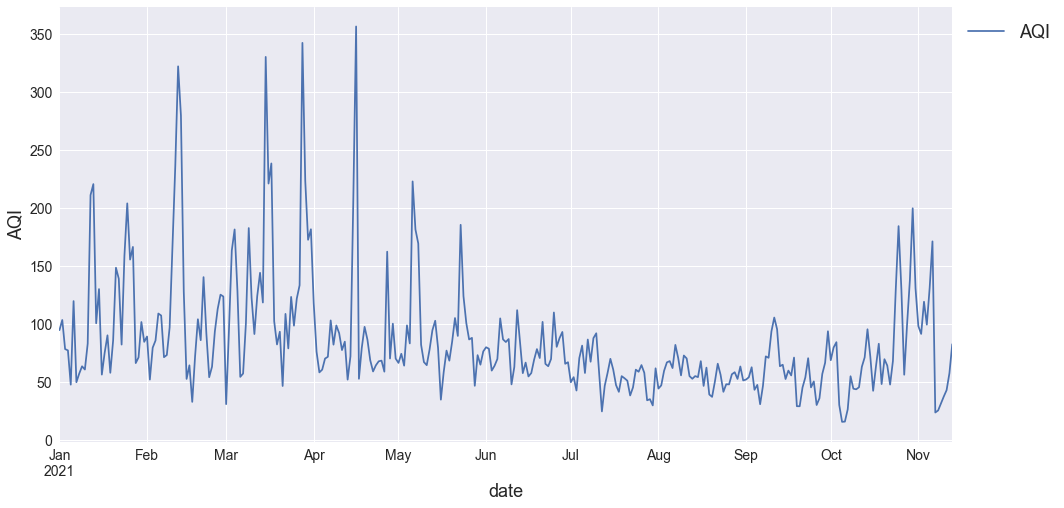

In [436]:
test_xiongan = test_cleaned[test_cleaned['城市']=='雄安新区']
df_xiongan_ts = test_xiongan.groupby('date').mean()

In [430]:
xiongan_lat = 115
xiongan_lon = 39
temp_forcast = []
for temp_date in tqdm(df_xiongan_ts.index):
    temp_year = temp_date.year
    temp_month = temp_date.month
    temp_day = temp_date.day
    temp_forcast.append(pred_AQI_KNN(
        dataframe=train_cleaned, 
        tilde_lat=xiongan_lat, tilde_lon=xiongan_lon, 
        tilde_year=temp_year, tilde_month=temp_month, tilde_day=temp_day, k=2))


  0%|                                                                                          | 0/317 [00:00<?, ?it/s]

The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 124.19318989226467
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 160.98652968614834


  0%|▎                                                                                 | 1/317 [00:11<59:34, 11.31s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 124.60011974122847
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 164.33356261855312


  1%|▌                                                                                 | 2/317 [00:22<59:32, 11.34s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 124.60620347729885
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 167.24788956536358


  1%|▊                                                                               | 3/317 [00:37<1:06:47, 12.76s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 124.40226350641285
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 169.82713543448358


  1%|█                                                                               | 4/317 [00:48<1:03:01, 12.08s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 124.25807548919967
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 172.31719028451064


  2%|█▎                                                                              | 5/317 [01:00<1:03:16, 12.17s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 124.46985241719801
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 175.08842627229862


  2%|█▌                                                                              | 6/317 [01:11<1:01:29, 11.86s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 125.29923178907346
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 178.55238764513868


  2%|█▊                                                                              | 7/317 [01:22<1:00:01, 11.62s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 126.94283876032233
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 183.03827250645494


  3%|██                                                                                | 8/317 [01:33<58:43, 11.40s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 129.55296692381663
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 188.67542178469054


  3%|██▎                                                                               | 9/317 [01:44<57:57, 11.29s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 133.27569032115005
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 195.3227956684338


  3%|██▍                                                                            | 10/317 [01:59<1:03:32, 12.42s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 138.23060920146722
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 202.55018375998537


  3%|██▋                                                                            | 11/317 [02:11<1:02:43, 12.30s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 144.38594549407105
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 209.64917901085047


  4%|██▉                                                                            | 12/317 [02:25<1:05:04, 12.80s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 151.38279339618938
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 215.67051473151608


  4%|███▏                                                                           | 13/317 [02:37<1:03:15, 12.49s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 158.45326045668045
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 219.52960422965137


  4%|███▍                                                                           | 14/317 [02:49<1:02:20, 12.35s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 164.5682811247382
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 220.2329713445326


  5%|███▋                                                                           | 15/317 [03:01<1:01:17, 12.18s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 168.82447605803378
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 217.2155993763361


  5%|███▉                                                                           | 16/317 [03:12<1:00:17, 12.02s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 170.91174087308625
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 210.6734140788075


  5%|████▎                                                                            | 17/317 [03:23<58:21, 11.67s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 171.40913055489648
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 201.7093570680164


  6%|████▌                                                                            | 18/317 [03:35<58:46, 11.79s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 171.7073131343704
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 192.15503813302928


  6%|████▊                                                                            | 19/317 [03:47<58:20, 11.75s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 173.53063764458923
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 184.0769259466256


  6%|█████                                                                            | 20/317 [03:59<58:56, 11.91s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 178.23376001582426
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 179.1417259149814


  7%|█████▎                                                                           | 21/317 [04:11<57:49, 11.72s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 186.16689477609438
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 178.09566413461945


  7%|█████▌                                                                           | 22/317 [04:23<58:01, 11.80s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 196.38158241292558
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 180.55846396573733


  7%|█████▋                                                                         | 23/317 [04:36<1:00:45, 12.40s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 206.80412777779148
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 185.18396182214883


  8%|██████▏                                                                          | 24/317 [04:48<59:58, 12.28s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 214.8122087116286
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 190.0875466989599


  8%|██████▏                                                                        | 25/317 [05:01<1:00:33, 12.44s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 217.99896165212314
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 193.36329849985557


  8%|██████▋                                                                          | 26/317 [05:13<58:56, 12.15s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 214.85641759149152
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 193.5284404721496


  9%|██████▉                                                                          | 27/317 [05:24<57:47, 11.96s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 205.1661006649745
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 189.8027147460972


  9%|███████▏                                                                         | 28/317 [05:35<56:32, 11.74s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 190.0129920161956
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 182.20357464756324


  9%|███████▍                                                                         | 29/317 [05:47<55:54, 11.65s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 171.4782262361792
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 171.4831396443665


  9%|███████▋                                                                         | 30/317 [05:59<55:46, 11.66s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 152.15680441605753
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 158.94777397899904


 10%|███████▉                                                                         | 31/317 [06:11<56:35, 11.87s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 134.65955106174647
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 146.20084519303475


 10%|████████▏                                                                        | 32/317 [06:23<56:39, 11.93s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 121.20550075578072
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 134.84843970954924


 10%|████████▍                                                                        | 33/317 [06:36<58:02, 12.26s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 113.3357433970407
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 126.2120607469328


 11%|████████▍                                                                      | 34/317 [06:51<1:01:34, 13.06s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 111.73032773795114
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 121.0974355998746


 11%|████████▋                                                                      | 35/317 [07:06<1:04:03, 13.63s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 116.10861037003069
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 119.6650035609125


 11%|████████▉                                                                      | 36/317 [07:17<1:00:44, 12.97s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 125.2259439355298
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 121.42781973076617


 12%|█████████▍                                                                       | 37/317 [07:28<57:31, 12.33s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 137.00816365807003
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 125.36920290140483


 12%|█████████▋                                                                       | 38/317 [07:38<54:30, 11.72s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 148.8578467846873
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 130.1416863176824


 12%|█████████▉                                                                       | 39/317 [07:51<55:25, 11.96s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 158.11816227201183
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 134.30039386554182


 13%|██████████▏                                                                      | 40/317 [08:03<55:54, 12.11s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 162.61413874321684
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 136.54125923669085


 13%|██████████▍                                                                      | 41/317 [08:16<56:11, 12.21s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 161.13982836685327
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 135.93474913746678


 13%|██████████▋                                                                      | 42/317 [08:28<55:32, 12.12s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 153.74732575078994
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 132.13796330459613


 14%|██████████▉                                                                      | 43/317 [08:39<53:39, 11.75s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 141.7298293950144
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 125.52863210084836


 14%|███████████▏                                                                     | 44/317 [08:50<52:23, 11.51s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 127.27273678892794
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 117.17332148127268


 14%|███████████▍                                                                     | 45/317 [09:01<51:38, 11.39s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 112.8556927999599
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 108.57169100881211


 15%|███████████▊                                                                     | 46/317 [09:12<50:35, 11.20s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 100.58699535266767
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 101.21928267095409


 15%|████████████                                                                     | 47/317 [09:22<49:50, 11.07s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 91.69160114921513
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 96.14617978530744


 15%|████████████▎                                                                    | 48/317 [09:33<49:30, 11.04s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 86.323032883229
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 93.63139825892637


 15%|████████████▌                                                                    | 49/317 [09:44<49:04, 10.99s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 83.73996014002824
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 93.21847211481963


 16%|████████████▊                                                                    | 50/317 [09:55<48:38, 10.93s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 82.7396049763152
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 94.00539355421512


 16%|█████████████                                                                    | 51/317 [10:06<48:39, 10.97s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 82.1473676408385
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 95.047872711658


 16%|█████████████▎                                                                   | 52/317 [10:17<48:16, 10.93s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 81.16929716426866
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 95.68007991409546


 17%|█████████████▌                                                                   | 53/317 [10:28<48:02, 10.92s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 79.50797150973892
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 95.63193237343928


 17%|█████████████▊                                                                   | 54/317 [10:39<47:46, 10.90s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 77.26448721542255
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 94.94744280371104


 17%|██████████████                                                                   | 55/317 [10:50<48:33, 11.12s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 74.73527083579867
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 93.805890246495


 18%|██████████████▎                                                                  | 56/317 [11:01<48:19, 11.11s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 72.22862719997876
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 92.3706881391405


 18%|██████████████▌                                                                  | 57/317 [11:12<47:40, 11.00s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 69.97987528071587
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 90.74444459954147


 18%|██████████████▊                                                                  | 58/317 [11:23<47:06, 10.91s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 68.17005555427838
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 89.03039626649252


 19%|███████████████                                                                  | 59/317 [11:34<47:13, 10.98s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 66.67673032338034
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 86.3062947128272


 19%|███████████████▎                                                                 | 60/317 [11:45<46:55, 10.96s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 67.45015481525625
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 86.08335787913656


 19%|███████████████▌                                                                 | 61/317 [11:55<46:21, 10.87s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 69.39119711931745
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 87.0971250689718


 20%|███████████████▊                                                                 | 62/317 [12:06<46:16, 10.89s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 72.29933830526859
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 89.36868185579048


 20%|████████████████                                                                 | 63/317 [12:17<45:58, 10.86s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 75.64202043491387
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 92.48258618918625


 20%|████████████████▎                                                                | 64/317 [12:28<45:21, 10.76s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 78.64766209233281
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 95.63554191113727


 21%|████████████████▌                                                                | 65/317 [12:38<45:04, 10.73s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 80.52573680590737
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 97.86231842909187


 21%|████████████████▊                                                                | 66/317 [12:49<44:45, 10.70s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 80.72477342094417
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 98.35173652538786


 21%|█████████████████                                                                | 67/317 [13:01<46:11, 11.09s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 79.11543984129479
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 96.71959101308296


 21%|█████████████████▍                                                               | 68/317 [13:14<48:53, 11.78s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 76.02323163835047
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 93.12891517975501


 22%|█████████████████▋                                                               | 69/317 [13:29<51:57, 12.57s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 72.10816059378956
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 88.22311509022022


 22%|█████████████████▉                                                               | 70/317 [13:39<49:21, 11.99s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 68.15325451502524
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 82.91880848675841


 22%|██████████████████▏                                                              | 71/317 [13:50<47:39, 11.62s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 64.84823800660128
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 78.15110465388234


 23%|██████████████████▍                                                              | 72/317 [14:01<46:34, 11.41s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 62.637591518743854
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 74.66054726569725


 23%|██████████████████▋                                                              | 73/317 [14:12<45:33, 11.20s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.66363158549135
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.87277166390122


 23%|██████████████████▉                                                              | 74/317 [14:23<44:48, 11.06s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.798001973104085
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.87599609148597


 24%|███████████████████▏                                                             | 75/317 [14:34<44:48, 11.11s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 62.73082753383396
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 74.46893674146192


 24%|███████████████████▍                                                             | 76/317 [14:45<44:21, 11.04s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 64.07761397033886
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 77.24074191982616


 24%|███████████████████▋                                                             | 77/317 [14:55<43:54, 10.98s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 65.46854533037816
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 80.65255321710298


 25%|███████████████████▉                                                             | 78/317 [15:06<43:29, 10.92s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 66.60103041460646
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 84.10885601440165


 25%|████████████████████▏                                                            | 79/317 [15:17<43:04, 10.86s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 67.25806290728879
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 87.02465890246701


 25%|████████████████████▍                                                            | 80/317 [15:28<42:36, 10.79s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 67.31108911444194
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 88.90100300909033


 26%|████████████████████▋                                                            | 81/317 [15:39<42:52, 10.90s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 66.72653185865452
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 89.41127071209914


 26%|████████████████████▉                                                            | 82/317 [15:50<42:48, 10.93s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 65.57963875504072
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 88.47975462636384


 26%|█████████████████████▏                                                           | 83/317 [16:01<43:08, 11.06s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 64.06022560811749
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 86.31751249365144


 26%|█████████████████████▍                                                           | 84/317 [16:12<42:57, 11.06s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 62.44901918845048
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 83.38508874374847


 27%|█████████████████████▋                                                           | 85/317 [16:23<42:14, 10.92s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.0580543383651
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 80.28086390126278


 27%|█████████████████████▉                                                           | 86/317 [16:34<42:30, 11.04s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 60.15376416421652
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 77.59149542960621


 27%|██████████████████████▏                                                          | 87/317 [16:45<42:16, 11.03s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 59.896058009655455
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 75.76048258821915


 28%|██████████████████████▍                                                          | 88/317 [16:56<42:11, 11.06s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 60.31710938781942
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 75.01652220482936


 28%|██████████████████████▋                                                          | 89/317 [17:08<42:21, 11.15s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.33684243849145
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 75.3655570593692


 28%|██████████████████████▉                                                          | 90/317 [17:19<42:16, 11.17s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 62.791077975351996
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 76.6192026457081


 29%|███████████████████████▎                                                         | 91/317 [17:30<41:49, 11.11s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 64.45112537306385
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 78.43124269545417


 29%|███████████████████████▌                                                         | 92/317 [17:44<44:48, 11.95s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 66.03653268541446
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 80.33918214583666


 29%|███████████████████████▊                                                         | 93/317 [17:59<48:53, 13.10s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 67.24297725859677
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 81.831509089869


 30%|████████████████████████                                                         | 94/317 [18:11<46:38, 12.55s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 67.80375179585468
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 82.45698448723878


 30%|████████████████████████▎                                                        | 95/317 [18:22<44:57, 12.15s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 67.57571805829933
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 81.95909671147743


 30%|████████████████████████▌                                                        | 96/317 [18:33<43:09, 11.72s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 66.61034314274256
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 80.38258174013126


 31%|████████████████████████▊                                                        | 97/317 [18:44<42:13, 11.52s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 65.16299060217965
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 78.0907349547288


 31%|█████████████████████████                                                        | 98/317 [18:55<41:15, 11.30s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 63.61839819726768
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 75.66394084246768


 31%|█████████████████████████▎                                                       | 99/317 [19:05<40:36, 11.18s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 62.35364426898556
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 73.7054314557793


 32%|█████████████████████████▏                                                      | 100/317 [19:16<40:01, 11.07s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.595456953864606
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.62785068384025


 32%|█████████████████████████▍                                                      | 101/317 [19:27<39:19, 10.93s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.33515714189522
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.5070999299103


 32%|█████████████████████████▋                                                      | 102/317 [19:38<39:05, 10.91s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.33850996275723
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 73.06198374036897


 32%|█████████████████████████▉                                                      | 103/317 [19:53<43:29, 12.19s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.24435635050669
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 73.76479798541295


 33%|██████████████████████████▏                                                     | 104/317 [20:09<47:40, 13.43s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 60.708267718416
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 74.03561321021829


 33%|██████████████████████████▍                                                     | 105/317 [20:21<45:52, 12.98s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 59.53327552481039
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 73.44460514105836


 33%|██████████████████████████▊                                                     | 106/317 [20:34<45:40, 12.99s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 57.742310899300534
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 71.85164059543008


 34%|███████████████████████████                                                     | 107/317 [20:50<48:56, 13.99s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 55.57574828624061
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.44367133400591


 34%|███████████████████████████▎                                                    | 108/317 [21:09<53:56, 15.49s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 53.42614819437474
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.67111026703668


 34%|███████████████████████████▌                                                    | 109/317 [21:21<50:03, 14.44s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 51.739069544546616
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 64.11647903859996


 35%|███████████████████████████▊                                                    | 110/317 [21:35<49:07, 14.24s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 50.91108191588869
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 62.34232334813464


 35%|████████████████████████████                                                    | 111/317 [21:49<48:40, 14.18s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 51.208357741494005
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 61.76111428718476


 35%|████████████████████████████▎                                                   | 112/317 [22:00<45:04, 13.19s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 52.71774093669417
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 62.554580698950275


 36%|████████████████████████████▌                                                   | 113/317 [22:11<42:52, 12.61s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 55.33177372628973
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 64.65154255116111


 36%|████████████████████████████▊                                                   | 114/317 [22:22<41:07, 12.16s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.762989445057016
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.75753251731248


 36%|█████████████████████████████                                                   | 115/317 [22:33<39:05, 11.61s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 62.58232826440051
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 71.41977033676403


 37%|█████████████████████████████▎                                                  | 116/317 [22:43<37:53, 11.31s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 66.27992147903029
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 75.10892874050592


 37%|█████████████████████████████▌                                                  | 117/317 [22:54<37:13, 11.17s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 69.34784860360881
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 78.30323641141854


 37%|█████████████████████████████▊                                                  | 118/317 [23:05<36:54, 11.13s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 71.37784940780031
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 80.5662007970695


 38%|██████████████████████████████                                                  | 119/317 [23:16<36:16, 10.99s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 72.15311540342071
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 81.61152283589982


 38%|██████████████████████████████▎                                                 | 120/317 [23:27<36:10, 11.02s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 71.70232576310858
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 81.34662068689886


 38%|██████████████████████████████▌                                                 | 121/317 [23:40<37:44, 11.55s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 70.28901067634584
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 79.88424866495295


 38%|██████████████████████████████▊                                                 | 122/317 [23:52<37:55, 11.67s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 68.33381806038184
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 77.51604636746485


 39%|███████████████████████████████                                                 | 123/317 [24:07<41:12, 12.74s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 66.29898371889976
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 74.65314280425982


 39%|███████████████████████████████▎                                                | 124/317 [24:21<41:58, 13.05s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 64.58178967840594
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 71.75028450989527


 39%|███████████████████████████████▌                                                | 125/317 [24:31<39:23, 12.31s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 63.45342214330762
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.23271739654125


 40%|███████████████████████████████▊                                                | 126/317 [24:42<37:38, 11.82s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 63.048414639824685
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.43751151975839


 40%|████████████████████████████████                                                | 127/317 [24:54<37:03, 11.70s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 63.3813595219145
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.5708151928194


 40%|████████████████████████████████▎                                               | 128/317 [25:05<36:26, 11.57s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 64.3628253617814
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.67944599900868


 41%|████████████████████████████████▌                                               | 129/317 [25:17<36:51, 11.76s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 65.80604130354598
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.64116269151828


 41%|████████████████████████████████▊                                               | 130/317 [25:29<36:58, 11.86s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 67.43984998118353
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.1845008811142


 41%|█████████████████████████████████                                               | 131/317 [25:44<39:11, 12.64s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 68.94894027161766
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 70.9456050532042


 42%|█████████████████████████████████▎                                              | 132/317 [25:57<39:38, 12.86s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 70.04382997509136
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.5539734671463


 42%|█████████████████████████████████▌                                              | 133/317 [26:10<39:16, 12.81s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 70.53602052203172
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 73.720774413965


 42%|█████████████████████████████████▊                                              | 134/317 [26:21<37:47, 12.39s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 70.38085461806843
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 74.29593803913222


 43%|██████████████████████████████████                                              | 135/317 [26:34<38:08, 12.57s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 69.66328124527504
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 74.27105600197507


 43%|██████████████████████████████████▎                                             | 136/317 [26:48<39:20, 13.04s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 68.53260277181583
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 73.73033624124932


 43%|██████████████████████████████████▌                                             | 137/317 [27:02<39:44, 13.25s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 67.12188020287181
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.77829786642933


 44%|██████████████████████████████████▊                                             | 138/317 [27:16<40:09, 13.46s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 65.49752898145165
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 71.48518703969326


 44%|███████████████████████████████████                                             | 139/317 [27:28<38:23, 12.94s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 63.667784808669744
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.8803377711845


 44%|███████████████████████████████████▎                                            | 140/317 [27:40<37:52, 12.84s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.64355482186305
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.99406231528535


 44%|███████████████████████████████████▌                                            | 141/317 [27:53<37:23, 12.75s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 59.51178482350725
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 65.91725409254458


 45%|███████████████████████████████████▊                                            | 142/317 [28:05<37:07, 12.73s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 57.47095558641986
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 63.83518848343393


 45%|████████████████████████████████████                                            | 143/317 [28:19<37:43, 13.01s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 55.799218272111354
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 62.007451689970196


 45%|████████████████████████████████████▎                                           | 144/317 [28:31<36:12, 12.55s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 54.766462301910735
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 60.69986925978307


 46%|████████████████████████████████████▌                                           | 145/317 [28:43<36:07, 12.60s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 54.5365462742065
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 60.10409271102699


 46%|████████████████████████████████████▊                                           | 146/317 [28:56<36:10, 12.70s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 55.11216809221432
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 60.286757933212364


 46%|█████████████████████████████████████                                           | 147/317 [29:08<35:36, 12.57s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 56.348705587135655
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 61.19038794198459


 47%|█████████████████████████████████████▎                                          | 148/317 [29:23<37:25, 13.29s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.02312154837004
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 62.67757132825516


 47%|█████████████████████████████████████▌                                          | 149/317 [29:37<37:08, 13.27s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 59.91669771899627
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 64.58911632138555


 47%|█████████████████████████████████████▊                                          | 150/317 [29:48<35:33, 12.77s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.871904963342665
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.7872627035654


 48%|██████████████████████████████████████                                          | 151/317 [29:59<33:25, 12.08s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 63.80805668103289
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.17179874788017


 48%|██████████████████████████████████████▎                                         | 152/317 [30:09<32:03, 11.66s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 65.70606420827711
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 71.67469906440606


 48%|██████████████████████████████████████▌                                         | 153/317 [30:20<30:56, 11.32s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 67.58153829362368
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 74.24508806232762


 49%|██████████████████████████████████████▊                                         | 154/317 [30:32<31:09, 11.47s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 69.45735268336378
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 76.83095525895057


 49%|███████████████████████████████████████                                         | 155/317 [30:46<33:02, 12.24s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 71.33618426550528
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 79.3575993372079


 49%|███████████████████████████████████████▎                                        | 156/317 [31:02<35:49, 13.35s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 73.17348904883958
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 81.70462728386389


 50%|███████████████████████████████████████▌                                        | 157/317 [31:19<38:53, 14.59s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 74.86032460121896
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 83.69208947178518


 50%|███████████████████████████████████████▊                                        | 158/317 [31:33<38:06, 14.38s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 76.2304585070604
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 85.09149534562175


 50%|████████████████████████████████████████▏                                       | 159/317 [31:46<36:53, 14.01s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 77.09775300767824
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 85.67023680838263


 50%|████████████████████████████████████████▍                                       | 160/317 [32:02<37:44, 14.42s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 77.31209038940733
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 85.2602794340938


 51%|████████████████████████████████████████▋                                       | 161/317 [32:14<35:50, 13.78s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 76.80908730884545
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 83.82540844067888


 51%|████████████████████████████████████████▉                                       | 162/317 [32:27<35:14, 13.64s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 75.63118296564865
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 81.49755470981611


 51%|█████████████████████████████████████████▏                                      | 163/317 [32:41<35:21, 13.78s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 73.91354642557071
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 78.5647040809904


 52%|█████████████████████████████████████████▍                                      | 164/317 [32:55<34:54, 13.69s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 71.84579182611445
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 75.41330846336956


 52%|█████████████████████████████████████████▋                                      | 165/317 [33:09<34:43, 13.71s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 69.62830583196009
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.44550084204553


 52%|█████████████████████████████████████████▉                                      | 166/317 [33:22<34:39, 13.77s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 67.4377904296442
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.99803100103735


 53%|██████████████████████████████████████████▏                                     | 167/317 [33:35<33:10, 13.27s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 65.40723987201987
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 68.28536557480612


 53%|██████████████████████████████████████████▍                                     | 168/317 [33:49<33:39, 13.56s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 63.61933861447182
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.37864165067303


 53%|██████████████████████████████████████████▋                                     | 169/317 [34:01<32:17, 13.09s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 62.11135850221066
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.22019687350998


 54%|██████████████████████████████████████████▉                                     | 170/317 [34:15<33:06, 13.51s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 60.889581745845724
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.66306384417786


 54%|███████████████████████████████████████████▏                                    | 171/317 [34:29<32:42, 13.44s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 59.947706946703306
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 68.51803698277712


 54%|███████████████████████████████████████████▍                                    | 172/317 [34:43<33:34, 13.89s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 59.27872799272505
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.59047711953306


 55%|███████████████████████████████████████████▋                                    | 173/317 [35:03<37:04, 15.45s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.87060286602267
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 70.69703934142883


 55%|███████████████████████████████████████████▉                                    | 174/317 [35:24<41:11, 17.28s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.68648903098987
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 71.66652771807567


 55%|████████████████████████████████████████████▏                                   | 175/317 [35:41<40:28, 17.10s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.64444341068816
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.34074885642939


 56%|████████████████████████████████████████████▍                                   | 176/317 [36:00<41:38, 17.72s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.6169538708853
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.59117916753895


 56%|████████████████████████████████████████████▋                                   | 177/317 [36:20<43:05, 18.47s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.460177033826106
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.3532319192497


 56%|████████████████████████████████████████████▉                                   | 178/317 [36:37<41:28, 17.90s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.06230198150448
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 71.66081089182757


 56%|█████████████████████████████████████████████▏                                  | 179/317 [36:55<41:19, 17.96s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 57.38556531974593
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 70.6545452308839


 57%|█████████████████████████████████████████████▍                                  | 180/317 [37:11<39:57, 17.50s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 56.47893389764453
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.54702079595687


 57%|█████████████████████████████████████████████▋                                  | 181/317 [37:28<39:23, 17.38s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 55.45619892871362
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 68.55294486948189


 57%|█████████████████████████████████████████████▉                                  | 182/317 [37:48<40:50, 18.15s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 54.453503153256136
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.81527995739586


 58%|██████████████████████████████████████████████▏                                 | 183/317 [38:05<39:47, 17.82s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 53.58816353794013
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.36375079643884


 58%|██████████████████████████████████████████████▍                                 | 184/317 [38:22<38:58, 17.59s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 52.9346847308665
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.1255628992416


 58%|██████████████████████████████████████████████▋                                 | 185/317 [38:41<39:33, 17.98s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 52.5215384594264
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.98032041723368


 59%|██████████████████████████████████████████████▉                                 | 186/317 [39:00<39:28, 18.08s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 52.34253609229142
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.8294449055943


 59%|███████████████████████████████████████████████▏                                | 187/317 [39:19<39:44, 18.34s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 52.37325849054904
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.64685838466356


 59%|███████████████████████████████████████████████▍                                | 188/317 [39:38<39:56, 18.58s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 52.58475183484575
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.49156073344918


 60%|███████████████████████████████████████████████▋                                | 189/317 [39:57<39:46, 18.64s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 52.95075260140448
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.48293238547704


 60%|███████████████████████████████████████████████▉                                | 190/317 [40:14<38:46, 18.32s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 53.448905368477234
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.75393232323194


 60%|████████████████████████████████████████████████▏                               | 191/317 [40:26<34:33, 16.46s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 54.05916604439694
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.40086358838539


 61%|████████████████████████████████████████████████▍                               | 192/317 [40:39<32:04, 15.40s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 54.76275015591452
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 68.44449422775699


 61%|████████████████████████████████████████████████▋                               | 193/317 [40:52<30:15, 14.64s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 55.54290213535665
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.81213618294625


 61%|████████████████████████████████████████████████▉                               | 194/317 [41:05<28:50, 14.07s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 56.3862525001081
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 71.3460294706795


 62%|█████████████████████████████████████████████████▏                              | 195/317 [41:18<28:12, 13.87s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 57.28239674924732
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.83770263707741


 62%|█████████████████████████████████████████████████▍                              | 196/317 [41:34<29:08, 14.45s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.219856697757436
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 74.07913213768687


 62%|█████████████████████████████████████████████████▋                              | 197/317 [41:51<30:36, 15.30s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 59.17795387282831
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 74.9130475283343


 62%|█████████████████████████████████████████████████▉                              | 198/317 [42:08<31:20, 15.80s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 60.11594322765651
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 75.2636247361413


 63%|██████████████████████████████████████████████████▏                             | 199/317 [42:27<32:48, 16.68s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 60.96330277871526
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 75.13838868605716


 63%|██████████████████████████████████████████████████▍                             | 200/317 [42:45<33:13, 17.04s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.61773279330076
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 74.60717513776264


 63%|██████████████████████████████████████████████████▋                             | 201/317 [43:03<33:25, 17.29s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.957630441552396
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 73.77391703440901


 64%|██████████████████████████████████████████████████▉                             | 202/317 [43:21<33:32, 17.50s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.870857752033956
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 72.75485002264323


 64%|███████████████████████████████████████████████████▏                            | 203/317 [43:39<33:37, 17.70s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 61.29221633477311
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 71.66539040137192


 64%|███████████████████████████████████████████████████▍                            | 204/317 [43:58<34:08, 18.13s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 60.23375614905905
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 70.60787221712145


 65%|███████████████████████████████████████████████████▋                            | 205/317 [44:17<34:08, 18.29s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.79189518726537
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.65246565122754


 65%|███████████████████████████████████████████████████▉                            | 206/317 [44:34<33:22, 18.04s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 57.12550847987742
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 68.8136121911816


 65%|████████████████████████████████████████████████████▏                           | 207/317 [44:53<33:22, 18.21s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 55.413784696361695
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 68.03499106218001


 66%|████████████████████████████████████████████████████▍                           | 208/317 [45:11<33:03, 18.20s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 53.81168892580866
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.19734975855236


 66%|████████████████████████████████████████████████████▋                           | 209/317 [45:30<33:20, 18.52s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 52.418519004575394
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.15329684687914


 66%|████████████████████████████████████████████████████▉                           | 210/317 [45:49<33:00, 18.51s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 51.264951667303045
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 64.77867100693419


 67%|█████████████████████████████████████████████████████▏                          | 211/317 [46:07<32:47, 18.56s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 50.315610102872824
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 63.02160334416593


 67%|█████████████████████████████████████████████████████▌                          | 212/317 [46:25<31:49, 18.19s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 49.48346453563924
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 60.932422680356346


 67%|█████████████████████████████████████████████████████▊                          | 213/317 [46:42<31:16, 18.04s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 48.65596661073407
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 58.666125842406025


 68%|██████████████████████████████████████████████████████                          | 214/317 [47:00<30:41, 17.88s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 47.732287174361204
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 56.456901319970704


 68%|██████████████████████████████████████████████████████▎                         | 215/317 [47:18<30:27, 17.91s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 46.66291192019209
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 54.568123477162764


 68%|██████████████████████████████████████████████████████▌                         | 216/317 [47:36<30:08, 17.90s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 45.47392407184634
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 53.22481143404552


 68%|██████████████████████████████████████████████████████▊                         | 217/317 [47:53<29:33, 17.73s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 44.25970597674983
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 52.543121938534675


 69%|███████████████████████████████████████████████████████                         | 218/317 [48:10<29:01, 17.59s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 43.143221242509355
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 52.48078883393372


 69%|███████████████████████████████████████████████████████▎                        | 219/317 [48:28<28:44, 17.60s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 42.22308997612118
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 52.83419189851906


 69%|███████████████████████████████████████████████████████▌                        | 220/317 [48:46<28:52, 17.86s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 41.53586107367343
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 53.29390146820081


 70%|███████████████████████████████████████████████████████▊                        | 221/317 [49:03<28:07, 17.57s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 41.052290262647176
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 53.54408259747936


 70%|████████████████████████████████████████████████████████                        | 222/317 [49:22<28:07, 17.76s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 40.70499640412386
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 53.36691894859593


 70%|████████████████████████████████████████████████████████▎                       | 223/317 [49:40<28:05, 17.93s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 40.42753803631603
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 52.70780914530369


 71%|████████████████████████████████████████████████████████▌                       | 224/317 [49:58<27:56, 18.03s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 40.1832685691944
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 51.67584022905189


 71%|████████████████████████████████████████████████████████▊                       | 225/317 [50:16<27:37, 18.02s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 39.97466613236249
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 50.48631299165376


 71%|█████████████████████████████████████████████████████████                       | 226/317 [50:32<26:30, 17.48s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 39.838330465325924
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 49.37849392877134


 72%|█████████████████████████████████████████████████████████▎                      | 227/317 [50:49<25:44, 17.16s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 39.83625858545232
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 48.54746873348321


 72%|█████████████████████████████████████████████████████████▌                      | 228/317 [51:06<25:40, 17.31s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 40.04858577176599
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 48.1131830844004


 72%|█████████████████████████████████████████████████████████▊                      | 229/317 [51:25<26:04, 17.77s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 40.564278043143354
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 48.12511820115615


 73%|██████████████████████████████████████████████████████████                      | 230/317 [51:43<25:58, 17.91s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 41.46341036819484
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 48.583974517814234


 73%|██████████████████████████████████████████████████████████▎                     | 231/317 [52:02<25:57, 18.11s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 42.790311673150626
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 49.46082056150658


 73%|██████████████████████████████████████████████████████████▌                     | 232/317 [52:19<25:20, 17.89s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 44.52565821679171
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 50.70515035016701


 74%|██████████████████████████████████████████████████████████▊                     | 233/317 [52:38<25:19, 18.08s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 46.56977020251664
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 52.244403538985125


 74%|███████████████████████████████████████████████████████████                     | 234/317 [52:56<24:52, 17.99s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 48.74573453410114
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 53.980471608762855


 74%|███████████████████████████████████████████████████████████▎                    | 235/317 [53:14<24:41, 18.07s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 50.8230630782952
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 55.785511269977135


 74%|███████████████████████████████████████████████████████████▌                    | 236/317 [53:32<24:16, 17.98s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 52.55646333143679
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 57.498331446216305


 75%|███████████████████████████████████████████████████████████▊                    | 237/317 [53:50<23:52, 17.91s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 53.732724365326675
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 58.92794896871382


 75%|████████████████████████████████████████████████████████████                    | 238/317 [54:07<23:34, 17.91s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 54.21930413814651
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 59.876737852345286


 75%|████████████████████████████████████████████████████████████▎                   | 239/317 [54:25<22:59, 17.69s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 54.006666444477126
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 60.1911107718152


 76%|████████████████████████████████████████████████████████████▌                   | 240/317 [54:42<22:41, 17.68s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 53.23161373412662
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 59.82909737651818


 76%|████████████████████████████████████████████████████████████▊                   | 241/317 [55:00<22:34, 17.82s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 52.16507101853165
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 58.91190224973797


 76%|█████████████████████████████████████████████████████████████                   | 242/317 [55:18<22:19, 17.86s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 51.15224005080509
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 57.71939851206391


 77%|█████████████████████████████████████████████████████████████▎                  | 243/317 [55:35<21:43, 17.62s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 50.50997286415015
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 56.609813132975354


 77%|█████████████████████████████████████████████████████████████▌                  | 244/317 [55:53<21:22, 17.57s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 50.41099792138375
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 55.88494665132883


 77%|█████████████████████████████████████████████████████████████▊                  | 245/317 [56:11<21:22, 17.82s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 50.80324449249721
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 55.65994609503533


 78%|██████████████████████████████████████████████████████████████                  | 246/317 [56:28<20:37, 17.42s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 51.409024539288026
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 55.80469914795014


 78%|██████████████████████████████████████████████████████████████▎                 | 247/317 [56:45<20:19, 17.42s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 51.81779382854624
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 55.99298235328484


 78%|██████████████████████████████████████████████████████████████▌                 | 248/317 [57:02<19:47, 17.21s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 51.640536036646445
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 55.84120949063567


 79%|██████████████████████████████████████████████████████████████▊                 | 249/317 [57:20<19:54, 17.57s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 50.65966609396793
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 55.072464426277584


 79%|███████████████████████████████████████████████████████████████                 | 250/317 [57:37<19:18, 17.30s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 48.908203347632025
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 53.63045701939802


 79%|███████████████████████████████████████████████████████████████▎                | 251/317 [57:53<18:39, 16.96s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 46.64787813876835
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 51.69732893270241


 79%|███████████████████████████████████████████████████████████████▌                | 252/317 [58:12<19:03, 17.59s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 44.26663723054662
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 49.61982927853299


 80%|███████████████████████████████████████████████████████████████▊                | 253/317 [58:30<18:44, 17.57s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 42.15144728302627
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 47.79025788366411


 80%|████████████████████████████████████████████████████████████████                | 254/317 [58:47<18:19, 17.46s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 40.59345440079174
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 46.539861276119325


 80%|████████████████████████████████████████████████████████████████▎               | 255/317 [59:05<18:08, 17.55s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 39.753386446537675
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 46.081610834511146


 81%|████████████████████████████████████████████████████████████████▌               | 256/317 [59:21<17:24, 17.12s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 39.67755348472478
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 46.504033651457306


 81%|████████████████████████████████████████████████████████████████▊               | 257/317 [59:38<17:05, 17.08s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 40.33277636138728
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 47.79172395770538


 81%|█████████████████████████████████████████████████████████████████               | 258/317 [59:56<17:00, 17.29s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 41.63233263740301
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 49.84573253234368


 82%|███████████████████████████████████████████████████████████████▋              | 259/317 [1:00:14<16:58, 17.56s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 43.44629083249902
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 52.49471374848494


 82%|███████████████████████████████████████████████████████████████▉              | 260/317 [1:00:33<17:08, 18.04s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 45.60932469724872
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 55.50785915429929


 82%|████████████████████████████████████████████████████████████████▏             | 261/317 [1:00:51<16:53, 18.10s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 47.94179335169954
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 58.625265206252564


 83%|████████████████████████████████████████████████████████████████▍             | 262/317 [1:01:11<17:00, 18.56s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 50.28478138713741
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 61.6063680052905


 83%|████████████████████████████████████████████████████████████████▋             | 263/317 [1:01:30<16:50, 18.72s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 52.53084840730263
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 64.27587192580461


 83%|████████████████████████████████████████████████████████████████▉             | 264/317 [1:01:47<16:02, 18.16s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 54.626981996854916
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.53943262986863


 84%|█████████████████████████████████████████████████████████████████▏            | 265/317 [1:02:03<15:20, 17.70s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 56.54183904476463
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 68.3579087045657


 84%|█████████████████████████████████████████████████████████████████▍            | 266/317 [1:02:22<15:16, 17.98s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.21619846860305
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.69880688630245


 84%|█████████████████████████████████████████████████████████████████▋            | 267/317 [1:02:40<14:54, 17.89s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 59.533665238559834
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 70.50320365760088


 85%|█████████████████████████████████████████████████████████████████▉            | 268/317 [1:02:58<14:41, 17.99s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 60.34259346591602
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 70.69868175393802


 85%|██████████████████████████████████████████████████████████████████▏           | 269/317 [1:03:16<14:22, 17.96s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 60.5312952402956
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 70.25769233105049


 85%|██████████████████████████████████████████████████████████████████▍           | 270/317 [1:03:33<13:57, 17.83s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 60.1249650247835
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 69.2690318807687


 85%|██████████████████████████████████████████████████████████████████▋           | 271/317 [1:03:49<13:12, 17.22s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 59.356023737927806
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 67.98065887433953


 86%|██████████████████████████████████████████████████████████████████▉           | 272/317 [1:04:07<13:02, 17.40s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.66897818305266
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.7891042400833


 86%|███████████████████████████████████████████████████████████████████▏          | 273/317 [1:04:26<13:11, 17.99s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 58.64772126730933
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.17796296720053


 86%|███████████████████████████████████████████████████████████████████▍          | 274/317 [1:04:46<13:09, 18.36s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 59.88036584751556
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 66.62477112592332


 87%|███████████████████████████████████████████████████████████████████▋          | 275/317 [1:05:05<13:05, 18.70s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 62.79357900947817
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 68.49560355841388


 87%|███████████████████████████████████████████████████████████████████▉          | 276/317 [1:05:23<12:40, 18.54s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 67.4966121878685
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 71.94119378368205


 87%|████████████████████████████████████████████████████████████████████▏         | 277/317 [1:05:40<12:04, 18.11s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 73.68058814614949
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 76.81181001838033


 88%|████████████████████████████████████████████████████████████████████▍         | 278/317 [1:05:57<11:34, 17.80s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 80.61891657873052
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 82.62120336019605


 88%|████████████████████████████████████████████████████████████████████▋         | 279/317 [1:06:15<11:16, 17.80s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 87.29829920140078
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 88.59654556599035


 88%|████████████████████████████████████████████████████████████████████▉         | 280/317 [1:06:33<10:56, 17.75s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 92.6683813283718
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 93.83297341607367


 89%|█████████████████████████████████████████████████████████████████████▏        | 281/317 [1:06:53<11:05, 18.47s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 95.9422175044423
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 97.52670735757494


 89%|█████████████████████████████████████████████████████████████████████▍        | 282/317 [1:07:09<10:23, 17.80s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 96.839662720286
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 99.21207913249165


 89%|█████████████████████████████████████████████████████████████████████▋        | 283/317 [1:07:26<09:50, 17.37s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 95.67282508812013
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 98.90831274867244


 90%|█████████████████████████████████████████████████████████████████████▉        | 284/317 [1:07:43<09:36, 17.47s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 93.23321956521964
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 97.11090126703152


 90%|██████████████████████████████████████████████████████████████████████▏       | 285/317 [1:08:01<09:19, 17.48s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 90.52546897458112
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 94.6283836722791


 90%|██████████████████████████████████████████████████████████████████████▎       | 286/317 [1:08:19<09:11, 17.80s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 88.45537261739274
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 92.3314686711471


 91%|██████████████████████████████████████████████████████████████████████▌       | 287/317 [1:08:37<08:48, 17.62s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 87.5884558321567
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 90.91149776148632


 91%|██████████████████████████████████████████████████████████████████████▊       | 288/317 [1:08:54<08:30, 17.59s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 88.05188416833293
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 90.72842014990347


 91%|███████████████████████████████████████████████████████████████████████       | 289/317 [1:09:12<08:14, 17.67s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 89.58876712589478
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 91.78253324781245


 91%|███████████████████████████████████████████████████████████████████████▎      | 290/317 [1:09:29<07:55, 17.62s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 91.72110574742815
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 93.7963689909164


 92%|███████████████████████████████████████████████████████████████████████▌      | 291/317 [1:09:47<07:40, 17.72s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 93.9495581124054
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 96.35972960866847


 92%|███████████████████████████████████████████████████████████████████████▊      | 292/317 [1:10:04<07:16, 17.47s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 95.91414388931668
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 99.0756459155334


 92%|████████████████████████████████████████████████████████████████████████      | 293/317 [1:10:22<07:04, 17.70s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 97.45904382736695
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 101.64984716801864


 93%|████████████████████████████████████████████████████████████████████████▎     | 294/317 [1:10:40<06:44, 17.58s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 98.58720352884191
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 103.89507886915892


 93%|████████████████████████████████████████████████████████████████████████▌     | 295/317 [1:10:57<06:27, 17.60s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 99.34514530846918
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 105.66871957681842


 93%|████████████████████████████████████████████████████████████████████████▊     | 296/317 [1:11:16<06:13, 17.78s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 99.71587227824246
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 106.80306425951903


 94%|█████████████████████████████████████████████████████████████████████████     | 297/317 [1:11:34<05:57, 17.88s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 99.58900098316724
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 107.09142137187145


 94%|█████████████████████████████████████████████████████████████████████████▎    | 298/317 [1:11:51<05:37, 17.78s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 98.82294952423474
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 106.35135010656032


 94%|█████████████████████████████████████████████████████████████████████████▌    | 299/317 [1:12:08<05:14, 17.45s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 97.35167159884564
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 104.52743898028835


 95%|█████████████████████████████████████████████████████████████████████████▊    | 300/317 [1:12:26<04:59, 17.63s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 95.26362595232415
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 101.7650179624086


 95%|██████████████████████████████████████████████████████████████████████████    | 301/317 [1:12:43<04:40, 17.52s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 92.8076674425733
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 98.40576068190082


 95%|██████████████████████████████████████████████████████████████████████████▎   | 302/317 [1:13:01<04:25, 17.67s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 90.33189056832308
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 94.90759872578202


 96%|██████████████████████████████████████████████████████████████████████████▌   | 303/317 [1:13:18<04:04, 17.46s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 88.19630808299786
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 91.73418548300575


 96%|██████████████████████████████████████████████████████████████████████████▊   | 304/317 [1:13:36<03:47, 17.49s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 86.7008167480631
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 89.26722636128103


 96%|███████████████████████████████████████████████████████████████████████████   | 305/317 [1:13:53<03:29, 17.45s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 86.04957762145908
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 87.77333949923812


 97%|███████████████████████████████████████████████████████████████████████████▎  | 306/317 [1:14:12<03:15, 17.80s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 86.35342765130925
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 87.4271891417522


 97%|███████████████████████████████████████████████████████████████████████████▌  | 307/317 [1:14:30<02:57, 17.77s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 87.65990396250241
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 88.3689424832


 97%|███████████████████████████████████████████████████████████████████████████▊  | 308/317 [1:14:51<02:49, 18.82s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 89.98949698235775
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 90.75854323319577


 97%|████████████████████████████████████████████████████████████████████████████  | 309/317 [1:15:12<02:35, 19.49s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 93.34679095737404
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 94.78337812990257


 98%|████████████████████████████████████████████████████████████████████████████▎ | 310/317 [1:15:33<02:19, 19.87s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 97.68020209141842
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 100.58855561738929


 98%|████████████████████████████████████████████████████████████████████████████▌ | 311/317 [1:15:54<02:01, 20.28s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 102.79511075151109
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 108.13613611519065


 98%|████████████████████████████████████████████████████████████████████████████▊ | 312/317 [1:16:13<01:39, 19.93s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 108.26853094241122
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 117.04811749068116


 99%|█████████████████████████████████████████████████████████████████████████████ | 313/317 [1:16:30<01:15, 18.95s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 113.43375724785574
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 126.51712853811838


 99%|█████████████████████████████████████████████████████████████████████████████▎| 314/317 [1:16:46<00:54, 18.27s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 117.47538619772968
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 135.35384864265777


 99%|█████████████████████████████████████████████████████████████████████████████▌| 315/317 [1:17:03<00:35, 17.69s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 119.61235134410957
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 142.1854566159909


100%|█████████████████████████████████████████████████████████████████████████████▊| 316/317 [1:17:18<00:16, 16.91s/it]

The year effect model has been fitted.
year_effect -10.800798511521862
The pandas package has been loaded.
Province has been added.
The latitude of the province has been added.
The longitude of the province has been added.
The latitude of the city has been added.
The longitude of the city has been added.
保定
The pandas package has been loaded.
date_effect 119.2948870562007
The year effect model has been fitted.
year_effect -12.04318051179871
石家庄
The pandas package has been loaded.
date_effect 145.75647566592673


100%|██████████████████████████████████████████████████████████████████████████████| 317/317 [1:17:33<00:00, 14.68s/it]

The year effect model has been fitted.
year_effect -10.800798511521862


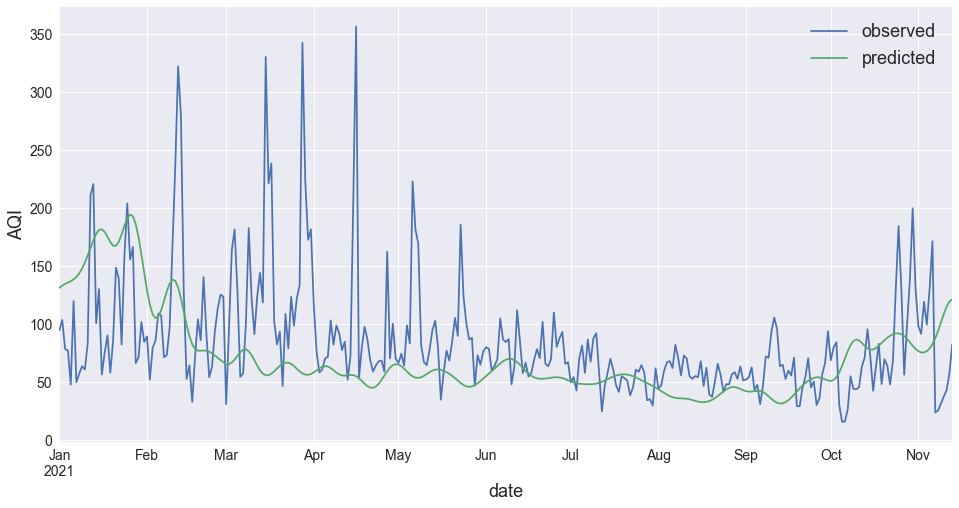

In [439]:
df_xiongan_ts['predicted'] = temp_forcast
plot_xiongan_ts = df_xiongan_ts['AQI'].plot(label='observed')
df_xiongan_ts['predicted'].plot(label='predicted')
font_xiongan_ts = {
'size' : 18,
}
plt.xlabel('date',font_xiongan_ts)
plt.ylabel('AQI',font_xiongan_ts)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(bbox_to_anchor=(1.0, 1.0), prop=font_xiongan_ts, loc = 1)
plt.savefig('论文/Figures/plot_xiongan_ts.pdf')
plt.show()